In [1]:
#######################
# TENSORFLOW V1 vs V2 #
#######################


#Defining a static graph in TF v1.x style 

import tensorflow as tf

g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name = 'a')
    b = tf.constant(2, name = 'b')
    c = tf.constant(3, name = 'c')
    z = 2 * (a-b) + c
    
#Have to use .compat to make the current V2 compatible with V1

with tf.compat.v1.Session(graph = g) as sess: # creates a session - in V1 is necessary for the
                                              # operations and tensors of the graph to be executed
    print('Result: z = ', sess.run(z))

Result: z =  1


In [2]:
#TF v2 style - uses dynamic graphs (rather than static) 
# allows us to evaluate a operation on the fly 
# do not need to explicitly create a graph and a session

a = tf.constant(1, name = 'a')
b = tf.constant(2, name = 'b')
c = tf.constant(3, name = 'c')
z = 2 * (a-b) + c

tf.print('Result: z = ', z)

#way more convenient than v1.x

Result: z =  1


In [4]:
#Feeding data into a TF v1.x - had to use placeholder of the tensors and 'feed' them into a dictionary

g = tf.Graph()

with g.as_default():
    a = tf.compat.v1.placeholder(shape = None,
                                dtype = tf.int32, name = 'tf_a')
    b = tf.compat.v1.placeholder(shape = None,
                                dtype = tf.int32, name = 'tf_b')
    c = tf.compat.v1.placeholder(shape = None,
                                dtype = tf.int32, name = 'tf_c')
    z = 2 * (a-b) + c
    
with tf.compat.v1.Session(graph = g) as sess:
    feed_dict = {a:1, b:2, c: 3}
    print('Result: z = ', sess.run(z, feed_dict=feed_dict))

Result: z =  1


In [5]:
# In TF v2 you can feed data by defining a regular Python function

def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

# We can then simply call this function with Tensor objects as functional arguments
# you can also input tensors of higher ranks or numpy array or other python objects

#Here we provide scalar inputs (rank 0), as well as rank 1 and rank 2 as lists

tf.print('Scalar inputs:', compute_z(1, 2, 3))

tf.print('Rank 1 inputs:', compute_z([1], [2], [3]))

tf.print('Rank 2 inputs:', compute_z([[1]], [[2]], [[3]]))
    
#We will now leave behind TF v1.x and only use v2

Scalar inputs: 1
Rank 1 inputs: [1]
Rank 2 inputs: [[1]]


In [ ]:
################################################################
# Improving Computational Performance With Function Decorators #
################################################################

In [ ]:
# Computations via 'eager execution' (dynamic graphs) is not efficient
# V2 has a tool called AutoGraph that transforms Python code to TF graph code

@tf.function # annotating our compute_z function for graph compilation
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

#The tf.function creates a static graph but with dynamic typing capabilities
# not just static inputs (scalar ie) but can be int, float, list, or string inputs


In [6]:
# TF using a tracing mechianism to construct graphs based on the input arguments.
# It generates a tuple of keys based on the input "signature"
# TF will check if the graph with a corresponding key has been generated,
# if not, it will generate the graph and store the new key

#You can limit the way a function can be called though - specify the input signature via
# tf.TensorSpec objects

@tf.function(input_signature = (tf.TensorSpec(shape = [None],
                                             dtype = tf.int32),
                               tf.TensorSpec(shape = [None],
                                            dtype = tf.int32),
                                tf.TensorSpec(shape = [None],
                                            dtype = tf.int32)))

def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

#Can now call this function with rank 1 tensors

tf.print('Rank 1 inputs:', compute_z([1], [2], [3]))
tf.print('Rank 1 inputs:', compute_z([1,2], [2,4], [3, 6]))

Rank 1 inputs: [1]
Rank 1 inputs: [1 2]


In [ ]:
#However trying to call with other ranks will not work

tf.print('Rank 0 inputs:', compute_z(1, 2, 3))

tf.print('Rank 2 inputs:', compute_z([[1], [2]],
                                    [[2], [4]],
                                    [[3], [6]]))

#Will print a large error message

In [ ]:
#################################################################
# TF Variable Objects for Storing and Updating Model Parameters #
#################################################################

In [10]:
# Variables in TF are a special Tensor object
# allow us to store and update the parameters of the model during training

a = tf.Variable(initial_value = 3.14, name = 'var_a')
print(a)

b = tf.Variable(initial_value = [1, 2, 3], name = 'var_b')
print(b)

c = tf.Variable(initial_value = [True, False], name = 'var_c')
print(c)

d = tf.Variable(initial_value = ['abc'], name = 'var_d')
print(d)


<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'var_c:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'var_d:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [12]:
#Variables are trainable or have an attribute called trainable
# default is trainable = True but can be set to False

w = tf.Variable([1, 2, 3], trainable = False)
print(w.trainable)

False


In [13]:
#Variables can be modified by running operations such as .assign() and .assign_add()
print(w.assign([3, 1, 4], read_value = True))

w.assign_add([2, -1, 2], read_value=True)
print(w.value())

#The assign_add does element addition - 3+2 = 5
# The read_value = True (default) automatically returns the new values after updating
# setting to False will suppress the automatic return - the Variable will still be updated though

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [18]:
# Similar to initilization of NN with random weights to break the symmetry during backpropogation
# you can do the same with Variables

tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal() # object of a class GlorotNormal

tf.print(init(shape=(3,)))

#can use this to initiaze a Variable
v = tf.Variable(init(shape = (2,3))) #variable shape is 2,3 (two rows and three columns)
tf.print(v)

[-0.722795904 1.01456821 0.251808226]
[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [19]:
#Putting the above into a more practical case
# Defining a Variable inside the base tf.Module class with two variables (1 nontrainable)

class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape = (2, 3)),
                             trainable = True)
        self.w2 = tf.Variable(init(shape = (1, 2)),
                             trainable = False)

m = MyModule()

print('All module variables:', [v.shape for v in m.variables])

print('Trainable variable:', [v.shape for v in m.trainable_variables])


All module variables: [TensorShape([2, 3]), TensorShape([1, 2])]
Trainable variable: [TensorShape([2, 3])]


In [21]:
#You cannot create a Variable inside of a decorated function @tf.function

@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])
    
f(1)

#This will return a long error message

In [24]:
#One way around the issue above is to the define the variable before the decorated function

w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype = tf.float32)
tf.print(compute_z(x))

[[4.68231201]
 [3.49924636]
 [2.97944832]]


In [ ]:
###########################################################################
# Computing the gradients of the loss with respect to trainable variables #
###########################################################################

In [25]:
#TF provides context for calculating gradients of the computed tensors
# with respect to its dependent nodes in the computation graph
# To compute these gradients - you must "record" the computations via tf.GradientTape

#Below is a simple example with z = wx+b and loss of Loss = (y-z)^2 (squared loss btw target and prediction)

w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

True True


In [26]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw: ', dloss_dw)

dL/dw:  -0.559999764


In [ ]:
#############################################################
# Computing Gradients with respect to non-trainable tensors #
#############################################################

In [27]:
#For non-trainable variables or other Tensor objects need to modify GradientTape to tape.watch()
#Here x is a tensor (non-trainable)
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [ ]:
########################################################
# Keeping resources for multiple gradient computations #
########################################################

In [28]:
# tf.GradientTape by defauly only keeps the resources for a single gradient
# calling tape.gradient() once releases the info and the tape is cleared
# to compute more than one gradient - have to use tape persistent

with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw:', dloss_dw)

dloss_db = tape.gradient(loss, b)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


In [29]:
#If we are computing gradients of a loss term with respect to the parameters of a model
# we can define a optimizer and apply the gradients to optimize the model parameters

optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('Updated w:', w)
tf.print('Updated bias:', b)


Updated w: 1.0056
Updated bias: 0.504


In [ ]:
#########################################################################
# Simplifying implimentations of common architecture vias the Keras API #
#########################################################################

In [30]:
#Recap the basic steps of building a two densely (fully) connected layers NN

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

#late variable creation
model.build(input_shape = (None, 4))
model.summary()

#Param # for 1st layer is 80 because 16 * 4 + 16(extra bias node)
# param # for the second layer is 544 because 16 * 32 + 32 (extra bias node)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [34]:
#we can access both trainable and non-trainable variables
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


In [35]:
#Next we will configure the layers by applying different activation functions,
# variable initializers, or regularization methods

#Here we configure the first layer - specifying the initalizers for the kernel (weights matrix) 
# and bias variables

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
                    units = 16,
                    activation = tf.keras.activations.relu,
                    kernel_initializer= \
                        tf.keras.initializers.glorot_uniform(),
                    bias_initializer = tf.keras.initializers.Constant(2.0)
            ))

#For the second layer - specifying an L1 regularizer for the kernel (weight matrix)
model.add(tf.keras.layers.Dense(
                    units = 32,
                    activation = tf.keras.activations.sigmoid,
                    kernel_regularizer = tf.keras.regularizers.l1))


In [36]:
# We can then configure the model when we compile it after configuring the individual layers

model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.Accuracy(),
              tf.keras.metrics.Precision(),
              tf.keras.metrics.Recall()])

In [ ]:
#########################################
# Solving an XOR classification problem #
#########################################

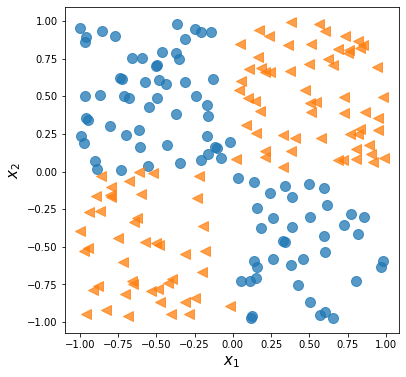

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low = -1, high = 1, size = (200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0 #if x0^i * x1^i < 0 then y^i is 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y == 0, 0],
        x[y == 0, 1], 'o', alpha = 0.75, markersize = 10)
plt.plot(x[y == 1, 0],
        x[y == 1, 1], '<', alpha = 0.75, markersize = 10)
plt.xlabel(r'$x_1$', size = 15)
plt.ylabel(r'$x_2$',size = 15)
plt.show()

#Below is a scatter plot of training and validation samples

In [3]:
# When deciding the architecture of the model - always a good idea to start simple
# below is a simple logistic regression model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1,
                               input_shape = (2,),
                               activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [4]:
#The model has three parameters - a 2x1 weigth matrix (kernel) and a bias vector of size 1
# We will compile the model and train it for 200 epochs using 2 batches

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics= [tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                validation_data=(x_valid, y_valid),
                epochs = 200, batch_size=2, verbose = 0)

#we will plot the learning curves, including the training and validation loss,
# as well as their accuracy

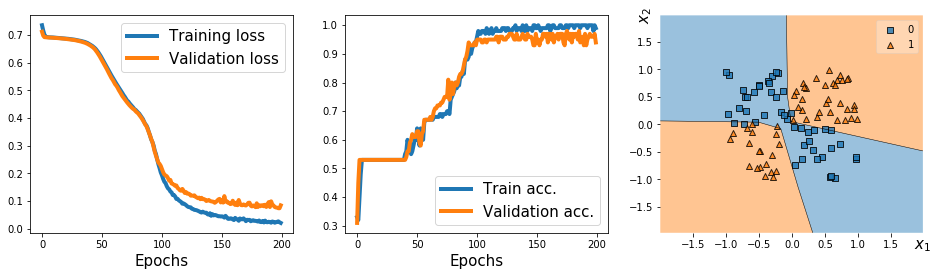

In [5]:
#Also use the MLxtend library to visualize the validation data and the decision boundary
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

#Clearly see from the graph that a model without hidden layers is force to use a linear
# decision boundary line
#Very high loss (.68-.70) and poor accuracy (<70%)

In [19]:
#To create a non-linear decision boundry - you must create a hidden layer
# There are two options - you can go wide or deep - wide is a smaller number of layers but more
# hidden units and deep is more layers but fewer units
# Each approach has its pros and cons

#Below is playing around with different depths of NN
# Here is depth 1
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 4, input_shape=(2, ),
                               activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                validation_data = (x_valid, y_valid),
                epochs = 200, batch_size = 2, verbose = 0)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


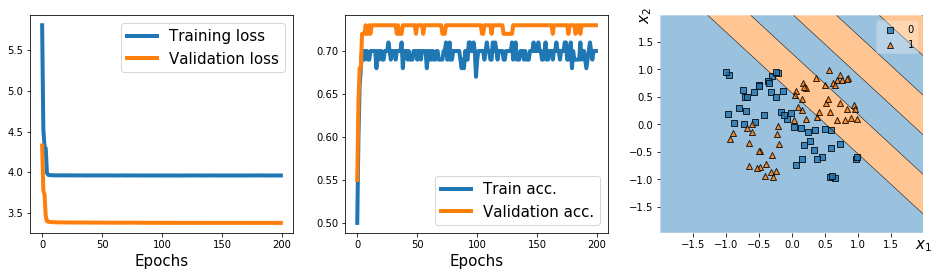

In [20]:
history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [17]:
# Here is depth 2
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 4, input_shape=(2, ),
                               activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                validation_data = (x_valid, y_valid),
                epochs = 200, batch_size = 2, verbose = 0)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


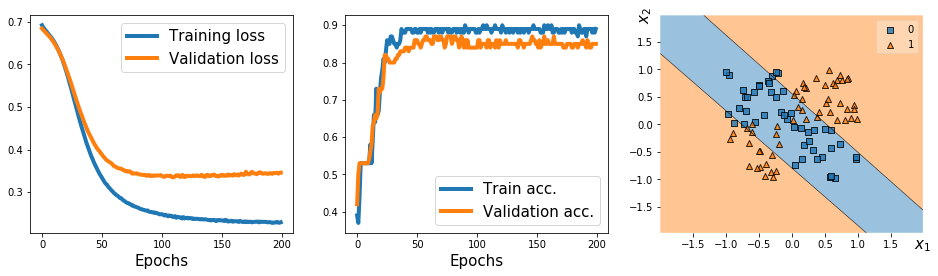

In [18]:
history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [13]:
# Here is depth 4
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 4, input_shape=(2, ),
                               activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])

hist = model.fit(x_train, y_train, 
                validation_data = (x_valid, y_valid),
                epochs = 200, batch_size = 2, verbose = 0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


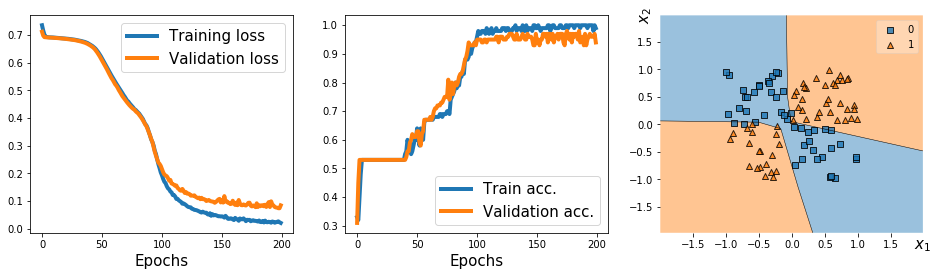

In [14]:
history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

#Much better than the other models above - there is 100% training acc and less ~95% 
# validation acc which suggests overfitting - but overall much better 

In [ ]:
##################################################################
# Making model building more flexible with Keras' functional API #
##################################################################

In [2]:
# We can make more complex models than the one above using the functional API
# Here we will first specify the input, construct the hidden layers (h1, h2, h3) with
# the output from each layer acting at the input for the next layer. 
# Then we specify the output as the final layer that received h3 as the input

tf.random.set_seed(1)

#Input layer
inputs = tf.keras.Input(shape = (2, ))

# Hidden Layers
h1 = tf.keras.layers.Dense(units = 4, activation = 'relu')(inputs)
h2 = tf.keras.layers.Dense(units = 4, activation = 'relu')(h1)
h3 = tf.keras.layers.Dense(units = 4, activation = 'relu')(h2)

# Output
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(h3)

#Construct a model:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.summary()

#look very similar to the simplified version but with the input layer

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the model:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.BinaryAccuracy()])

# Train the model:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200, batch_size=2, verbose=0)

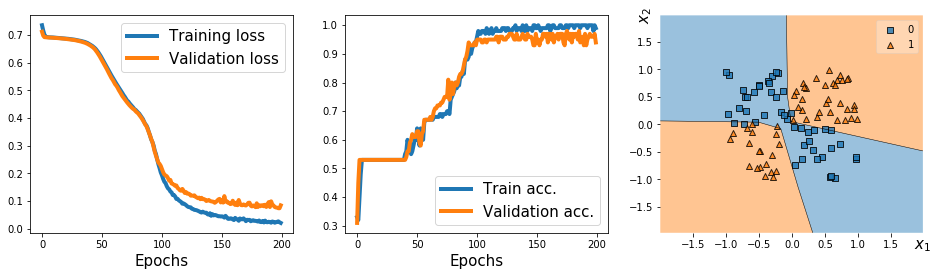

In [6]:
history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
###################################################
# Implimenting models based on Keras' model class #
###################################################

In [7]:
# Can create complex models by using the subclass of tf.keras.Model
# In the construction function __init__() we define the layers as attributes of the class
# so that they can accessed via the self reference attribute.
# Then the call() method - we specify how these layers are to be used in the forward pass

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(
            units = 4, activation = 'relu')
        self.hidden_2 = tf.keras.layers.Dense(
            units = 4, activation = 'relu')
        self.hidden_3 = tf.keras.layers.Dense(
            units = 4, activation = 'relu')
        self.output_layer = tf.keras.layers.Dense(
            units = 1, activation = 'sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)


In [8]:
# Because the class is built as a subclass of tf.keras.Model - it inherits the general model
# attributes, such as build(), compile(), and fit().
# Therefore, we can compile and train in the same way 

tf.random.set_seed(1)

model = MyModel()
model.build(input_shape = (None, 2))

model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  12        
_________________________________________________________________
dense_5 (Dense)              multiple                  20        
_________________________________________________________________
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Compile the model

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ([tf.keras.metrics.BinaryAccuracy()]))

# Train the model
model.fit(x_train, y_train,
         validation_data=(x_valid, y_valid),
         epochs=200, batch_size=2, verbose=0)

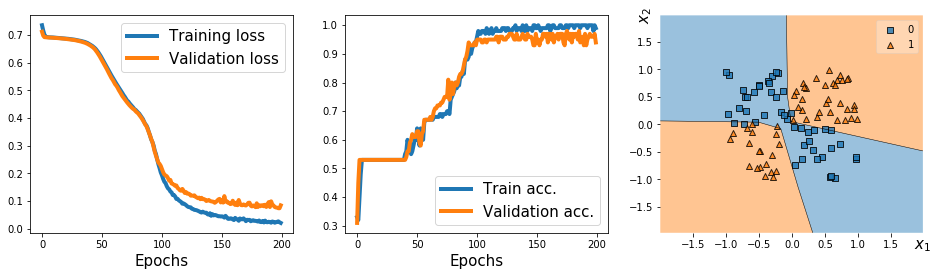

In [10]:
history = hist.history

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
###############################
# Writing Custom Keras Layers #
###############################

In [20]:
# If we want to define a layer that isnt already supported we can create a subclass
# using keras.layers.Layers class. 
# We will define a constructor (__init__) and a call() method
# In the constructor, we define the variables and other tensors for our customized layer
# We can create variables and initialize them in the constructor with input_shape
# or can delay and delegate it to the build() method for late variable creation.

#We can also define get_config() for serialization which will save a model using the customized layer

#We will define a new layer called NoisyLinear - w(x+e) + b

class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev = 0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.w = self.add_weight(name = 'weights',
                                shape = (input_shape[1],
                                        self.output_dim),
                                initializer='random_normal',
                                trainable=True)
        self.b = self.add_weight(shape = (self.output_dim,),
                                initializer='zeros',
                                trainable=True)
    
    def call(self, inputs, training = False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape = (batch, dim),
                                    mean = 0.0,
                                    stddev = self.noise_stddev)
            
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        
        z = tf.matmul(noisy_inputs, self.w) + self.b
        
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                      'noise_stddev': self.noise_stddev})
        return config
    

In [21]:
# Simple example to test the NoisyLinear
# We will define a new instance of this layer, initialize it by calling .build()
# and execute it on an input tensor. 
# We will then serialize it via .get_config() and restore via .from_config()

tf.random.set_seed(1)
noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape = (None, 4))

x = tf.zeros(shape = (1, 4))
tf.print(noisy_layer(x, training = True))


[[0 0.00821428 0 0]]


In [22]:
## re-building from config:
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training = True))

#This value is different than the previous one despite the same input layer
# this is because of the introduced noise from the noisy_layer

[[0 0.0108502861 0 0]]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_5 (NoisyLinear) multiple                  12        
_________________________________________________________________
dense_8 (Dense)              multiple                  20        
_________________________________________________________________
dense_9 (Dense)              multiple                  20        
_________________________________________________________________
dense_10 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


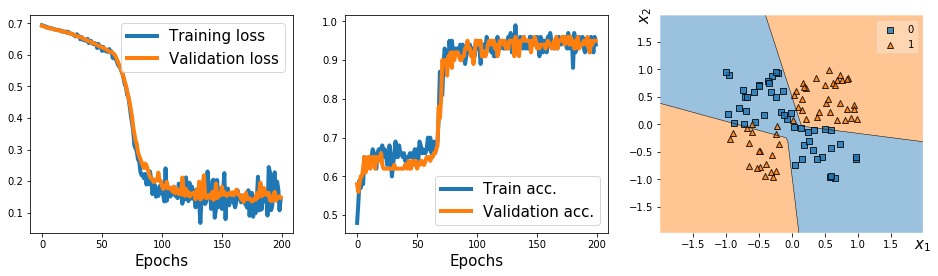

In [23]:
# Create a model for the XOR classification tasks including our NoisyLinear layer
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev = 0.1),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

model.build(input_shape= (None, 2))
model.summary()

#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])

#Train
hist = model.fit(x_train, y_train,
                validation_data = (x_valid, y_valid),
                epochs = 200, batch_size = 2, verbose = 0)

#Plotting
history = hist.history
fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw = 4)
plt.plot(history['val_loss'], lw = 4)
plt.legend(['Training loss', 'Validation loss'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw = 4)
plt.plot(history['val_binary_accuracy'], lw = 4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize = 15)
ax.set_xlabel('Epochs', size = 15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X = x_valid, y = y_valid.astype(np.integer),
                      clf = model)

ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size = 15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()


In [ ]:
#########################
# TensorFlow Estimators #
#########################

In [ ]:
################################
# Working with Feature Columns #
################################

In [24]:
# Using the Auto MPG dataset 
import pandas as pd

dataset_path = tf.keras.utils.get_file(
    "auto-mpg.data",
    ("http://archive.ics.uci.edu/ml/machine-learning"
    "-databases/auto-mpg/auto-mpg.data"))

column_names = [
    'MPG', 'Cylinders', 'Displacement',
    'Horsepower', 'Weight', 'Acceleration',
    'ModelYear', 'Origin'
]

df = pd.read_csv(dataset_path, names = column_names,
                na_values = '?', comment = '\t',
                sep = ' ', skipinitialspace=True)

#Drop the NA rows
df = df.dropna()
df = df.reset_index(drop = True)

#Train/test split
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(
    df, train_size = 0.8)
train_stats = df_train.describe().transpose()

numeric_column_names = [
    'Cylinders', 'Displacement', 
    'Horsepower', 'Weight',
    'Acceleration'
]

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (
        df_train_norm.loc[:, col_name] - mean) / std
    df_test_norm.loc[:, col_name] = (
        df_test_norm.loc[:, col_name] - mean)/std

df_train_norm.tail()


32768/30286 [================================] - 0s 0us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
299,34.2,-0.836182,-0.837172,-0.890427,-0.906475,-0.902880,79,1
283,17.0,1.532370,1.115943,0.736090,1.084095,-0.094503,79,1
211,13.0,1.532370,1.555393,1.142719,1.345054,-1.343814,76,1
176,23.0,-0.836182,-0.690688,-0.402472,0.012343,0.493409,75,2
199,18.5,0.348094,0.578836,0.193918,0.847412,0.199453,76,1


In [25]:
# We will now transform the 5 float columns into a feature column data structure that Estimators
# can use

numeric_features = []
for col_name in numeric_column_names:
    numeric_features.append(
        tf.feature_column.numeric_column(key = col_name))

In [26]:
# Next we are going to bucket the model year to simplify the learning task
# We have to first define a numeric feature based on the years - then these numeric features
# will be passed to bucketized_column function where we specify three cut off years (73, 76, 79)

feature_year = tf.feature_column.numeric_column(key = 'ModelYear')
bucketized_features = []
bucketized_features.append(
    tf.feature_column.bucketized_column(
        source_column=feature_year,
        boundaries=[73, 76, 79]))

In [27]:
# Next we will define a list for the unordered categorical feature "Origin"
# Because the list of names is small, we can use
# tf.feature_column.categorical_column_with_vocabulary_list

feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key = 'Origin',
    vocabulary_list=[1, 2, 3])

In [28]:
# For certain Estimators - they require 'dense columns' - so next step is to convert the existing
# categorical feature column to a dense column (from the step above).
# Can be done in two ways - indicator columns which codes for one-hot encoded vectors
# and embedding columns which map each index to a vector of random number floats which can be trained

#Here we will use indicator columns

categorical_indicator_features = []
categorical_indicator_features.append(
    tf.feature_column.indicator_column(feature_origin))

In [ ]:
#############################################
# Machine Learning with pre-made Estimators #
#############################################

In [29]:
#First step: define a function that processes the data and returns a TF dataset
# consisting of a tuple that contains the input features and the labels.
# Note the features must be in a dictionary with the keys matching the feature column names

def train_input_fn(df_train, batch_size = 8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_x), train_y))
    
    #Shuffle, repeat, and batch the examples
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [31]:
#Loading a batch from the dataset
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print('Keys:', batch[0].keys())
print('Batch Model Years:', batch[0]['ModelYear'])

Keys: dict_keys(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin'])
Batch Model Years: tf.Tensor([75 76 80 77 77 81 78 81], shape=(8,), dtype=int64)


In [32]:
#Also need to define an input function for the test dataset
def eval_input_fn(df_test, batch_size =8):
    df = df_test.copy()
    test_x, test_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(test_x), test_y))
    return dataset.batch(batch_size)

In [33]:
#Step 2: Define the feature columns
# Concatenating the lists that we previously created

all_feature_columns = (
    numeric_features + 
    bucketized_features + 
    categorical_indicator_features)

In [34]:
#Step 3: Instantiate a new Estimator
# Since we are predicting MPG - this is a regression task - will use tf.estimator.DNNRegressor
# When instantiating - we provide the list of feature columns and specify the number of hidden units 
# in each layer

#Here we will use 2 layers - first has 32 units and the second has 10

regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    model_dir='models/autompg-dnnregressor/') #directory for checkpoints

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
# Ready to use the Estimator for training, evaluation, and prediction
# Can be trained be calling the train() method, for which we require the previously
# defined input function

EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print('Training steps:', total_steps)

regressor.train(
    input_fn = lambda: train_input_fn(
        df_train_norm, batch_size=BATCH_SIZE),
    steps = total_steps)

Training steps: 40000
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Gra

INFO:tensorflow:global_step/sec: 595.422
INFO:tensorflow:loss = 351.8188, step = 5100 (0.168 sec)
INFO:tensorflow:global_step/sec: 596.74
INFO:tensorflow:loss = 218.88898, step = 5200 (0.169 sec)
INFO:tensorflow:global_step/sec: 523.865
INFO:tensorflow:loss = 313.65967, step = 5300 (0.191 sec)
INFO:tensorflow:global_step/sec: 480.885
INFO:tensorflow:loss = 399.51337, step = 5400 (0.219 sec)
INFO:tensorflow:global_step/sec: 474.547
INFO:tensorflow:loss = 226.05655, step = 5500 (0.199 sec)
INFO:tensorflow:global_step/sec: 820.312
INFO:tensorflow:loss = 182.90482, step = 5600 (0.121 sec)
INFO:tensorflow:global_step/sec: 822.24
INFO:tensorflow:loss = 355.47668, step = 5700 (0.122 sec)
INFO:tensorflow:global_step/sec: 814.18
INFO:tensorflow:loss = 234.07823, step = 5800 (0.123 sec)
INFO:tensorflow:global_step/sec: 658.419
INFO:tensorflow:loss = 278.69348, step = 5900 (0.152 sec)
INFO:tensorflow:global_step/sec: 618.503
INFO:tensorflow:loss = 207.98917, step = 6000 (0.164 sec)
INFO:tensorflo

INFO:tensorflow:loss = 158.95325, step = 12800 (0.200 sec)
INFO:tensorflow:global_step/sec: 444.101
INFO:tensorflow:loss = 38.242775, step = 12900 (0.234 sec)
INFO:tensorflow:global_step/sec: 505.318
INFO:tensorflow:loss = 49.024246, step = 13000 (0.190 sec)
INFO:tensorflow:global_step/sec: 452.798
INFO:tensorflow:loss = 80.655594, step = 13100 (0.221 sec)
INFO:tensorflow:global_step/sec: 509.606
INFO:tensorflow:loss = 96.680664, step = 13200 (0.195 sec)
INFO:tensorflow:global_step/sec: 509.793
INFO:tensorflow:loss = 78.449615, step = 13300 (0.201 sec)
INFO:tensorflow:global_step/sec: 551.773
INFO:tensorflow:loss = 78.18213, step = 13400 (0.176 sec)
INFO:tensorflow:global_step/sec: 517.719
INFO:tensorflow:loss = 38.92402, step = 13500 (0.194 sec)
INFO:tensorflow:global_step/sec: 490.071
INFO:tensorflow:loss = 93.72141, step = 13600 (0.204 sec)
INFO:tensorflow:global_step/sec: 470.491
INFO:tensorflow:loss = 54.393127, step = 13700 (0.217 sec)
INFO:tensorflow:global_step/sec: 440.522
INF

INFO:tensorflow:global_step/sec: 495.452
INFO:tensorflow:loss = 19.334423, step = 21100 (0.202 sec)
INFO:tensorflow:global_step/sec: 739.835
INFO:tensorflow:loss = 16.141502, step = 21200 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.354
INFO:tensorflow:loss = 37.00943, step = 21300 (0.133 sec)
INFO:tensorflow:global_step/sec: 798.084
INFO:tensorflow:loss = 28.45551, step = 21400 (0.126 sec)
INFO:tensorflow:global_step/sec: 907.237
INFO:tensorflow:loss = 8.434034, step = 21500 (0.112 sec)
INFO:tensorflow:global_step/sec: 584.631
INFO:tensorflow:loss = 13.700233, step = 21600 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.309
INFO:tensorflow:loss = 20.319626, step = 21700 (0.169 sec)
INFO:tensorflow:global_step/sec: 789.136
INFO:tensorflow:loss = 8.109217, step = 21800 (0.127 sec)
INFO:tensorflow:global_step/sec: 417.273
INFO:tensorflow:loss = 18.565544, step = 21900 (0.245 sec)
INFO:tensorflow:global_step/sec: 461.199
INFO:tensorflow:loss = 9.651761, step = 22000 (0.213 sec)
INFO:

INFO:tensorflow:loss = 22.051332, step = 29300 (0.207 sec)
INFO:tensorflow:global_step/sec: 651.729
INFO:tensorflow:loss = 7.332534, step = 29400 (0.154 sec)
INFO:tensorflow:global_step/sec: 773.628
INFO:tensorflow:loss = 5.4210196, step = 29500 (0.128 sec)
INFO:tensorflow:global_step/sec: 543.083
INFO:tensorflow:loss = 15.077811, step = 29600 (0.184 sec)
INFO:tensorflow:global_step/sec: 840.363
INFO:tensorflow:loss = 14.719494, step = 29700 (0.119 sec)
INFO:tensorflow:global_step/sec: 998.523
INFO:tensorflow:loss = 7.0428467, step = 29800 (0.100 sec)
INFO:tensorflow:global_step/sec: 1006.12
INFO:tensorflow:loss = 7.017431, step = 29900 (0.099 sec)
INFO:tensorflow:global_step/sec: 986.981
INFO:tensorflow:loss = 7.149973, step = 30000 (0.101 sec)
INFO:tensorflow:global_step/sec: 997.158
INFO:tensorflow:loss = 29.750494, step = 30100 (0.100 sec)
INFO:tensorflow:global_step/sec: 849.553
INFO:tensorflow:loss = 3.0548658, step = 30200 (0.118 sec)
INFO:tensorflow:global_step/sec: 832.127
INF

INFO:tensorflow:global_step/sec: 803.562
INFO:tensorflow:loss = 21.059118, step = 37600 (0.124 sec)
INFO:tensorflow:global_step/sec: 968.825
INFO:tensorflow:loss = 8.904739, step = 37700 (0.103 sec)
INFO:tensorflow:global_step/sec: 840.06
INFO:tensorflow:loss = 7.3204, step = 37800 (0.119 sec)
INFO:tensorflow:global_step/sec: 846.474
INFO:tensorflow:loss = 6.6902823, step = 37900 (0.118 sec)
INFO:tensorflow:global_step/sec: 717.994
INFO:tensorflow:loss = 5.4957943, step = 38000 (0.139 sec)
INFO:tensorflow:global_step/sec: 826.234
INFO:tensorflow:loss = 14.09829, step = 38100 (0.121 sec)
INFO:tensorflow:global_step/sec: 984.34
INFO:tensorflow:loss = 3.4618297, step = 38200 (0.102 sec)
INFO:tensorflow:global_step/sec: 899.531
INFO:tensorflow:loss = 26.317928, step = 38300 (0.111 sec)
INFO:tensorflow:global_step/sec: 993.365
INFO:tensorflow:loss = 47.24581, step = 38400 (0.101 sec)
INFO:tensorflow:global_step/sec: 868.969
INFO:tensorflow:loss = 9.91856, step = 38500 (0.115 sec)
INFO:tenso

In [37]:
# We can reload the last checkpoint
reloaded_regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    warm_start_from='models/autompg-dnnregressor/',
    model_dir='models/autompg-dnnregressor/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/autompg-dnnregressor/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
# To evaluate the predictive performance of the trained model
# we can use evaluate() method

eval_results = reloaded_regressor.evaluate(
    input_fn=lambda:eval_input_fn(df_test_norm, batch_size=8))

print('Average loss {:.4f}'.format(
    eval_results['average_loss']))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-18T14:24:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/autompg-dnnregressor/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.83679s
INFO:tensorflow:Finished evaluation at 2020-06-18-14:24:53
INFO:tensorflow:Saving dict for global step 40000: average_loss = 7

In [39]:
# Finally we will predict the target values on new data points with predict() method
# Normally, the dataset would be new, unlabeled data points
# Also note, the input function would only need to return a dataset consisting of features
# as labels wouldnt be known


#Here we are using the same input function
pred_res = regressor.predict(
    input_fn = lambda:eval_input_fn(
        df_test_norm, batch_size=8))

print(next(iter(pred_res)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/autompg-dnnregressor/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([19.675968], dtype=float32)}


In [40]:
# We will now use a different pre-made Estimator: the boosted tree regressor
# We just need to repeat steps 3 and 4 as steps 1 and 2 are the same the above

boosted_tree = tf.estimator.BoostedTreesRegressor(
    feature_columns=all_feature_columns,
    n_batches_per_layer=20,
    n_trees=200)

boosted_tree.train(
    input_fn = lambda:train_input_fn(
        df_train_norm, batch_size = 8))

eval_results = boosted_tree.evaluate(
    input_fn = lambda:eval_input_fn(
        df_test_norm, batch_size = 8))

print('Average loss {:.4f}'.format(
    eval_results['average_loss']))

#Average loss of 5.8386 is much better than the 19 in the DNNRegessor
#This is expected for a small dataset

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yn/5hhd3t215p7c414t13t3rzwm0000gn/T/tmpf52r2b_b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
The old _FeatureColumn APIs are being deprecat

INFO:tensorflow:loss = 0.3689586, step = 5580 (0.316 sec)
INFO:tensorflow:global_step/sec: 327.229
INFO:tensorflow:loss = 0.17820144, step = 5680 (0.445 sec)
INFO:tensorflow:global_step/sec: 227.878
INFO:tensorflow:loss = 0.18125698, step = 5780 (0.251 sec)
INFO:tensorflow:global_step/sec: 325.465
INFO:tensorflow:loss = 0.1575427, step = 5880 (0.347 sec)
INFO:tensorflow:global_step/sec: 343.649
INFO:tensorflow:loss = 0.5644219, step = 5980 (0.252 sec)
INFO:tensorflow:global_step/sec: 353.007
INFO:tensorflow:loss = 0.13606131, step = 6080 (0.228 sec)
INFO:tensorflow:global_step/sec: 470.732
INFO:tensorflow:loss = 0.25506932, step = 6180 (0.241 sec)
INFO:tensorflow:global_step/sec: 427.155
INFO:tensorflow:loss = 0.0819938, step = 6280 (0.250 sec)
INFO:tensorflow:global_step/sec: 410.004
INFO:tensorflow:loss = 0.06707145, step = 6380 (0.312 sec)
INFO:tensorflow:global_step/sec: 285.315
INFO:tensorflow:loss = 0.25663835, step = 6480 (0.334 sec)
INFO:tensorflow:global_step/sec: 329.056
INFO

INFO:tensorflow:global_step/sec: 245.897
INFO:tensorflow:loss = 0.01963302, step = 13780 (0.332 sec)
INFO:tensorflow:global_step/sec: 293.674
INFO:tensorflow:loss = 0.006488923, step = 13880 (0.383 sec)
INFO:tensorflow:global_step/sec: 247.133
INFO:tensorflow:loss = 0.017147252, step = 13980 (0.459 sec)
INFO:tensorflow:global_step/sec: 244.536
INFO:tensorflow:loss = 0.009291249, step = 14080 (0.405 sec)
INFO:tensorflow:global_step/sec: 246.304
INFO:tensorflow:loss = 0.0033008961, step = 14180 (0.354 sec)
INFO:tensorflow:global_step/sec: 279.258
INFO:tensorflow:loss = 0.012831043, step = 14280 (0.379 sec)
INFO:tensorflow:global_step/sec: 248.05
INFO:tensorflow:loss = 0.048148282, step = 14380 (0.360 sec)
INFO:tensorflow:global_step/sec: 242.817
INFO:tensorflow:loss = 0.010974282, step = 14480 (0.522 sec)
INFO:tensorflow:global_step/sec: 215.661
INFO:tensorflow:loss = 0.00793718, step = 14580 (0.308 sec)
INFO:tensorflow:global_step/sec: 339.417
INFO:tensorflow:loss = 0.01123783, step = 1

INFO:tensorflow:global_step/sec: 293.839
INFO:tensorflow:loss = 0.038108855, step = 21780 (0.360 sec)
INFO:tensorflow:global_step/sec: 280.143
INFO:tensorflow:loss = 0.0012883081, step = 21880 (0.374 sec)
INFO:tensorflow:global_step/sec: 271.29
INFO:tensorflow:loss = 0.0011662443, step = 21980 (0.425 sec)
INFO:tensorflow:global_step/sec: 235.417
INFO:tensorflow:loss = 0.00090176106, step = 22080 (0.458 sec)
INFO:tensorflow:global_step/sec: 219.044
INFO:tensorflow:loss = 0.0016908254, step = 22180 (0.346 sec)
INFO:tensorflow:global_step/sec: 256.715
INFO:tensorflow:loss = 0.0005697271, step = 22280 (0.361 sec)
INFO:tensorflow:global_step/sec: 305.143
INFO:tensorflow:loss = 0.0011783497, step = 22380 (0.365 sec)
INFO:tensorflow:global_step/sec: 263.26
INFO:tensorflow:loss = 0.00035651983, step = 22480 (0.393 sec)
INFO:tensorflow:global_step/sec: 277.283
INFO:tensorflow:loss = 0.00067769794, step = 22580 (0.405 sec)
INFO:tensorflow:global_step/sec: 218.768
INFO:tensorflow:loss = 0.0015130

In [ ]:
###############################################################
# Using Estimators for MNIST handwritten digit classification #
###############################################################

In [1]:
# Will be using the DNNClassifier Estimator to classify the MNIST dataset
# Follows similar steps to the above regressor

#Loading the dataset and specifying the hyperparameters
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

BUFFER_SIZE = 10000 #For shuffling the dataset
BATCH_SIZE = 64 # size of the mini-batches
NUM_EPOCHS = 20 # number of training epocs
steps_per_epoch = np.ceil(60000 / BATCH_SIZE) #number of iterations in each epoch

In [2]:
#Next we will define a helper function that will preprocess the input image and its label
# The input image is of the type 'uint8' (range[0, 255])
# we will use tf.image.covert_image_dtype() to convert to type tf.float(32)(range[0, 1])

def preprocess(item):
    image = item['image']
    label = item['label']
    image = tf.image.convert_image_dtype(
        image, tf.float32)
    image = tf.reshape(image, (-1, ))
    
    return {'image-pixels':image}, label[..., tf.newaxis] #dictionary of feature - one key

In [5]:
#Step 1: define two input functions (one for training and one for evaluation)

def train_input_fn():
    datasets = tfds.load(name = 'mnist')
    mnist_train = datasets['train']
    
    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

def eval_input_fn():
    datasets = tfds.load(name = 'mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset


In [7]:
# Step 2: Define the feature columns:

image_feature_column = tf.feature_column.numeric_column(
    key = 'image-pixels', shape = (28 * 28)) # 28 * 28 is the size (784) of the MNIST images

In [8]:
# Step 3: Create a new estimator - two hidden layers, 32 units in the first
# and 16 units in the second
# We also specify the number of classes (10 digits) using the n_classes argument

dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32, 16],
    n_classes=10,
    model_dir = 'models/mnist-dnn')

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
#Step 4: Use the estimator for training, evaluation, and prediction

dnn_classifier.train(
    input_fn=train_input_fn,
    steps = NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn = eval_input_fn)

print(eval_result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 2.4188833, step = 0


INFO:tensorflow:loss = 2.4188833, step = 0


INFO:tensorflow:global_step/sec: 96.8801


INFO:tensorflow:global_step/sec: 96.8801


INFO:tensorflow:loss = 2.3102121, step = 100 (1.035 sec)


INFO:tensorflow:loss = 2.3102121, step = 100 (1.035 sec)


INFO:tensorflow:global_step/sec: 87.4216


INFO:tensorflow:global_step/sec: 87.4216


INFO:tensorflow:loss = 2.2271032, step = 200 (1.149 sec)


INFO:tensorflow:loss = 2.2271032, step = 200 (1.149 sec)


INFO:tensorflow:global_step/sec: 102.359


INFO:tensorflow:global_step/sec: 102.359


INFO:tensorflow:loss = 2.202654, step = 300 (0.972 sec)


INFO:tensorflow:loss = 2.202654, step = 300 (0.972 sec)


INFO:tensorflow:global_step/sec: 98.8577


INFO:tensorflow:global_step/sec: 98.8577


INFO:tensorflow:loss = 2.078441, step = 400 (1.020 sec)


INFO:tensorflow:loss = 2.078441, step = 400 (1.020 sec)


INFO:tensorflow:global_step/sec: 100.291


INFO:tensorflow:global_step/sec: 100.291


INFO:tensorflow:loss = 2.1541648, step = 500 (0.988 sec)


INFO:tensorflow:loss = 2.1541648, step = 500 (0.988 sec)


INFO:tensorflow:global_step/sec: 99.6473


INFO:tensorflow:global_step/sec: 99.6473


INFO:tensorflow:loss = 2.011963, step = 600 (1.004 sec)


INFO:tensorflow:loss = 2.011963, step = 600 (1.004 sec)


INFO:tensorflow:global_step/sec: 112.922


INFO:tensorflow:global_step/sec: 112.922


INFO:tensorflow:loss = 2.0133152, step = 700 (0.886 sec)


INFO:tensorflow:loss = 2.0133152, step = 700 (0.886 sec)


INFO:tensorflow:global_step/sec: 123.303


INFO:tensorflow:global_step/sec: 123.303


INFO:tensorflow:loss = 1.9438232, step = 800 (0.811 sec)


INFO:tensorflow:loss = 1.9438232, step = 800 (0.811 sec)


INFO:tensorflow:global_step/sec: 390.443


INFO:tensorflow:global_step/sec: 390.443


INFO:tensorflow:loss = 1.95366, step = 900 (0.258 sec)


INFO:tensorflow:loss = 1.95366, step = 900 (0.258 sec)


INFO:tensorflow:global_step/sec: 126.655


INFO:tensorflow:global_step/sec: 126.655


INFO:tensorflow:loss = 1.9475965, step = 1000 (0.788 sec)


INFO:tensorflow:loss = 1.9475965, step = 1000 (0.788 sec)


INFO:tensorflow:global_step/sec: 121.146


INFO:tensorflow:global_step/sec: 121.146


INFO:tensorflow:loss = 1.8197879, step = 1100 (0.826 sec)


INFO:tensorflow:loss = 1.8197879, step = 1100 (0.826 sec)


INFO:tensorflow:global_step/sec: 143.977


INFO:tensorflow:global_step/sec: 143.977


INFO:tensorflow:loss = 1.8374488, step = 1200 (0.694 sec)


INFO:tensorflow:loss = 1.8374488, step = 1200 (0.694 sec)


INFO:tensorflow:global_step/sec: 203.352


INFO:tensorflow:global_step/sec: 203.352


INFO:tensorflow:loss = 1.7134299, step = 1300 (0.492 sec)


INFO:tensorflow:loss = 1.7134299, step = 1300 (0.492 sec)


INFO:tensorflow:global_step/sec: 156.184


INFO:tensorflow:global_step/sec: 156.184


INFO:tensorflow:loss = 1.7343798, step = 1400 (0.647 sec)


INFO:tensorflow:loss = 1.7343798, step = 1400 (0.647 sec)


INFO:tensorflow:global_step/sec: 178.126


INFO:tensorflow:global_step/sec: 178.126


INFO:tensorflow:loss = 1.6007563, step = 1500 (0.557 sec)


INFO:tensorflow:loss = 1.6007563, step = 1500 (0.557 sec)


INFO:tensorflow:global_step/sec: 138.059


INFO:tensorflow:global_step/sec: 138.059


INFO:tensorflow:loss = 1.4848069, step = 1600 (0.722 sec)


INFO:tensorflow:loss = 1.4848069, step = 1600 (0.722 sec)


INFO:tensorflow:global_step/sec: 130.647


INFO:tensorflow:global_step/sec: 130.647


INFO:tensorflow:loss = 1.4525166, step = 1700 (0.767 sec)


INFO:tensorflow:loss = 1.4525166, step = 1700 (0.767 sec)


INFO:tensorflow:global_step/sec: 257.904


INFO:tensorflow:global_step/sec: 257.904


INFO:tensorflow:loss = 1.4207274, step = 1800 (0.390 sec)


INFO:tensorflow:loss = 1.4207274, step = 1800 (0.390 sec)


INFO:tensorflow:global_step/sec: 94.9472


INFO:tensorflow:global_step/sec: 94.9472


INFO:tensorflow:loss = 1.4391618, step = 1900 (1.050 sec)


INFO:tensorflow:loss = 1.4391618, step = 1900 (1.050 sec)


INFO:tensorflow:global_step/sec: 144.489


INFO:tensorflow:global_step/sec: 144.489


INFO:tensorflow:loss = 1.3448836, step = 2000 (0.692 sec)


INFO:tensorflow:loss = 1.3448836, step = 2000 (0.692 sec)


INFO:tensorflow:global_step/sec: 195.634


INFO:tensorflow:global_step/sec: 195.634


INFO:tensorflow:loss = 1.3031816, step = 2100 (0.511 sec)


INFO:tensorflow:loss = 1.3031816, step = 2100 (0.511 sec)


INFO:tensorflow:global_step/sec: 144.08


INFO:tensorflow:global_step/sec: 144.08


INFO:tensorflow:loss = 1.2155104, step = 2200 (0.694 sec)


INFO:tensorflow:loss = 1.2155104, step = 2200 (0.694 sec)


INFO:tensorflow:global_step/sec: 153.975


INFO:tensorflow:global_step/sec: 153.975


INFO:tensorflow:loss = 1.376236, step = 2300 (0.649 sec)


INFO:tensorflow:loss = 1.376236, step = 2300 (0.649 sec)


INFO:tensorflow:global_step/sec: 167.823


INFO:tensorflow:global_step/sec: 167.823


INFO:tensorflow:loss = 1.2295657, step = 2400 (0.597 sec)


INFO:tensorflow:loss = 1.2295657, step = 2400 (0.597 sec)


INFO:tensorflow:global_step/sec: 164.538


INFO:tensorflow:global_step/sec: 164.538


INFO:tensorflow:loss = 1.2323515, step = 2500 (0.608 sec)


INFO:tensorflow:loss = 1.2323515, step = 2500 (0.608 sec)


INFO:tensorflow:global_step/sec: 211.81


INFO:tensorflow:global_step/sec: 211.81


INFO:tensorflow:loss = 1.2552037, step = 2600 (0.473 sec)


INFO:tensorflow:loss = 1.2552037, step = 2600 (0.473 sec)


INFO:tensorflow:global_step/sec: 191.614


INFO:tensorflow:global_step/sec: 191.614


INFO:tensorflow:loss = 1.0581274, step = 2700 (0.521 sec)


INFO:tensorflow:loss = 1.0581274, step = 2700 (0.521 sec)


INFO:tensorflow:global_step/sec: 359.323


INFO:tensorflow:global_step/sec: 359.323


INFO:tensorflow:loss = 1.3034341, step = 2800 (0.278 sec)


INFO:tensorflow:loss = 1.3034341, step = 2800 (0.278 sec)


INFO:tensorflow:global_step/sec: 114.505


INFO:tensorflow:global_step/sec: 114.505


INFO:tensorflow:loss = 1.0877767, step = 2900 (0.873 sec)


INFO:tensorflow:loss = 1.0877767, step = 2900 (0.873 sec)


INFO:tensorflow:global_step/sec: 183.396


INFO:tensorflow:global_step/sec: 183.396


INFO:tensorflow:loss = 1.164623, step = 3000 (0.546 sec)


INFO:tensorflow:loss = 1.164623, step = 3000 (0.546 sec)


INFO:tensorflow:global_step/sec: 182.465


INFO:tensorflow:global_step/sec: 182.465


INFO:tensorflow:loss = 1.0814869, step = 3100 (0.547 sec)


INFO:tensorflow:loss = 1.0814869, step = 3100 (0.547 sec)


INFO:tensorflow:global_step/sec: 231.467


INFO:tensorflow:global_step/sec: 231.467


INFO:tensorflow:loss = 1.1635594, step = 3200 (0.432 sec)


INFO:tensorflow:loss = 1.1635594, step = 3200 (0.432 sec)


INFO:tensorflow:global_step/sec: 190.241


INFO:tensorflow:global_step/sec: 190.241


INFO:tensorflow:loss = 0.91411567, step = 3300 (0.526 sec)


INFO:tensorflow:loss = 0.91411567, step = 3300 (0.526 sec)


INFO:tensorflow:global_step/sec: 180.156


INFO:tensorflow:global_step/sec: 180.156


INFO:tensorflow:loss = 1.0763642, step = 3400 (0.555 sec)


INFO:tensorflow:loss = 1.0763642, step = 3400 (0.555 sec)


INFO:tensorflow:global_step/sec: 159.399


INFO:tensorflow:global_step/sec: 159.399


INFO:tensorflow:loss = 0.8856362, step = 3500 (0.627 sec)


INFO:tensorflow:loss = 0.8856362, step = 3500 (0.627 sec)


INFO:tensorflow:global_step/sec: 229.602


INFO:tensorflow:global_step/sec: 229.602


INFO:tensorflow:loss = 0.97418547, step = 3600 (0.435 sec)


INFO:tensorflow:loss = 0.97418547, step = 3600 (0.435 sec)


INFO:tensorflow:global_step/sec: 427.912


INFO:tensorflow:global_step/sec: 427.912


INFO:tensorflow:loss = 1.0423347, step = 3700 (0.236 sec)


INFO:tensorflow:loss = 1.0423347, step = 3700 (0.236 sec)


INFO:tensorflow:global_step/sec: 136.479


INFO:tensorflow:global_step/sec: 136.479


INFO:tensorflow:loss = 0.973033, step = 3800 (0.731 sec)


INFO:tensorflow:loss = 0.973033, step = 3800 (0.731 sec)


INFO:tensorflow:global_step/sec: 239.556


INFO:tensorflow:global_step/sec: 239.556


INFO:tensorflow:loss = 0.85308725, step = 3900 (0.417 sec)


INFO:tensorflow:loss = 0.85308725, step = 3900 (0.417 sec)


INFO:tensorflow:global_step/sec: 239.637


INFO:tensorflow:global_step/sec: 239.637


INFO:tensorflow:loss = 0.85986173, step = 4000 (0.418 sec)


INFO:tensorflow:loss = 0.85986173, step = 4000 (0.418 sec)


INFO:tensorflow:global_step/sec: 236.027


INFO:tensorflow:global_step/sec: 236.027


INFO:tensorflow:loss = 0.82142115, step = 4100 (0.424 sec)


INFO:tensorflow:loss = 0.82142115, step = 4100 (0.424 sec)


INFO:tensorflow:global_step/sec: 232.05


INFO:tensorflow:global_step/sec: 232.05


INFO:tensorflow:loss = 0.71004546, step = 4200 (0.431 sec)


INFO:tensorflow:loss = 0.71004546, step = 4200 (0.431 sec)


INFO:tensorflow:global_step/sec: 236.454


INFO:tensorflow:global_step/sec: 236.454


INFO:tensorflow:loss = 1.0609939, step = 4300 (0.423 sec)


INFO:tensorflow:loss = 1.0609939, step = 4300 (0.423 sec)


INFO:tensorflow:global_step/sec: 241.869


INFO:tensorflow:global_step/sec: 241.869


INFO:tensorflow:loss = 0.7974506, step = 4400 (0.413 sec)


INFO:tensorflow:loss = 0.7974506, step = 4400 (0.413 sec)


INFO:tensorflow:global_step/sec: 220.046


INFO:tensorflow:global_step/sec: 220.046


INFO:tensorflow:loss = 0.7676301, step = 4500 (0.454 sec)


INFO:tensorflow:loss = 0.7676301, step = 4500 (0.454 sec)


INFO:tensorflow:global_step/sec: 386.766


INFO:tensorflow:global_step/sec: 386.766


INFO:tensorflow:loss = 0.95645475, step = 4600 (0.259 sec)


INFO:tensorflow:loss = 0.95645475, step = 4600 (0.259 sec)


INFO:tensorflow:global_step/sec: 169.744


INFO:tensorflow:global_step/sec: 169.744


INFO:tensorflow:loss = 0.93234617, step = 4700 (0.589 sec)


INFO:tensorflow:loss = 0.93234617, step = 4700 (0.589 sec)


INFO:tensorflow:global_step/sec: 222.606


INFO:tensorflow:global_step/sec: 222.606


INFO:tensorflow:loss = 0.709085, step = 4800 (0.449 sec)


INFO:tensorflow:loss = 0.709085, step = 4800 (0.449 sec)


INFO:tensorflow:global_step/sec: 232.344


INFO:tensorflow:global_step/sec: 232.344


INFO:tensorflow:loss = 0.84751815, step = 4900 (0.430 sec)


INFO:tensorflow:loss = 0.84751815, step = 4900 (0.430 sec)


INFO:tensorflow:global_step/sec: 236.655


INFO:tensorflow:global_step/sec: 236.655


INFO:tensorflow:loss = 0.7606187, step = 5000 (0.422 sec)


INFO:tensorflow:loss = 0.7606187, step = 5000 (0.422 sec)


INFO:tensorflow:global_step/sec: 225.932


INFO:tensorflow:global_step/sec: 225.932


INFO:tensorflow:loss = 0.7956046, step = 5100 (0.443 sec)


INFO:tensorflow:loss = 0.7956046, step = 5100 (0.443 sec)


INFO:tensorflow:global_step/sec: 196.133


INFO:tensorflow:global_step/sec: 196.133


INFO:tensorflow:loss = 0.7943629, step = 5200 (0.509 sec)


INFO:tensorflow:loss = 0.7943629, step = 5200 (0.509 sec)


INFO:tensorflow:global_step/sec: 226.262


INFO:tensorflow:global_step/sec: 226.262


INFO:tensorflow:loss = 0.8230079, step = 5300 (0.442 sec)


INFO:tensorflow:loss = 0.8230079, step = 5300 (0.442 sec)


INFO:tensorflow:global_step/sec: 235.512


INFO:tensorflow:global_step/sec: 235.512


INFO:tensorflow:loss = 0.8753005, step = 5400 (0.425 sec)


INFO:tensorflow:loss = 0.8753005, step = 5400 (0.425 sec)


INFO:tensorflow:global_step/sec: 282.248


INFO:tensorflow:global_step/sec: 282.248


INFO:tensorflow:loss = 0.82815313, step = 5500 (0.354 sec)


INFO:tensorflow:loss = 0.82815313, step = 5500 (0.354 sec)


INFO:tensorflow:global_step/sec: 533.968


INFO:tensorflow:global_step/sec: 533.968


INFO:tensorflow:loss = 0.6762978, step = 5600 (0.188 sec)


INFO:tensorflow:loss = 0.6762978, step = 5600 (0.188 sec)


INFO:tensorflow:global_step/sec: 108.202


INFO:tensorflow:global_step/sec: 108.202


INFO:tensorflow:loss = 0.6538144, step = 5700 (0.924 sec)


INFO:tensorflow:loss = 0.6538144, step = 5700 (0.924 sec)


INFO:tensorflow:global_step/sec: 177.557


INFO:tensorflow:global_step/sec: 177.557


INFO:tensorflow:loss = 0.8349362, step = 5800 (0.568 sec)


INFO:tensorflow:loss = 0.8349362, step = 5800 (0.568 sec)


INFO:tensorflow:global_step/sec: 193.235


INFO:tensorflow:global_step/sec: 193.235


INFO:tensorflow:loss = 0.7301174, step = 5900 (0.513 sec)


INFO:tensorflow:loss = 0.7301174, step = 5900 (0.513 sec)


INFO:tensorflow:global_step/sec: 199.054


INFO:tensorflow:global_step/sec: 199.054


INFO:tensorflow:loss = 0.7373838, step = 6000 (0.503 sec)


INFO:tensorflow:loss = 0.7373838, step = 6000 (0.503 sec)


INFO:tensorflow:global_step/sec: 180.979


INFO:tensorflow:global_step/sec: 180.979


INFO:tensorflow:loss = 0.85592234, step = 6100 (0.551 sec)


INFO:tensorflow:loss = 0.85592234, step = 6100 (0.551 sec)


INFO:tensorflow:global_step/sec: 138.19


INFO:tensorflow:global_step/sec: 138.19


INFO:tensorflow:loss = 0.5655712, step = 6200 (0.727 sec)


INFO:tensorflow:loss = 0.5655712, step = 6200 (0.727 sec)


INFO:tensorflow:global_step/sec: 212.698


INFO:tensorflow:global_step/sec: 212.698


INFO:tensorflow:loss = 0.7051326, step = 6300 (0.469 sec)


INFO:tensorflow:loss = 0.7051326, step = 6300 (0.469 sec)


INFO:tensorflow:global_step/sec: 108.247


INFO:tensorflow:global_step/sec: 108.247


INFO:tensorflow:loss = 0.5491206, step = 6400 (0.924 sec)


INFO:tensorflow:loss = 0.5491206, step = 6400 (0.924 sec)


INFO:tensorflow:global_step/sec: 338.856


INFO:tensorflow:global_step/sec: 338.856


INFO:tensorflow:loss = 0.7127465, step = 6500 (0.295 sec)


INFO:tensorflow:loss = 0.7127465, step = 6500 (0.295 sec)


INFO:tensorflow:global_step/sec: 128.733


INFO:tensorflow:global_step/sec: 128.733


INFO:tensorflow:loss = 0.6214452, step = 6600 (0.776 sec)


INFO:tensorflow:loss = 0.6214452, step = 6600 (0.776 sec)


INFO:tensorflow:global_step/sec: 182.4


INFO:tensorflow:global_step/sec: 182.4


INFO:tensorflow:loss = 0.6498542, step = 6700 (0.548 sec)


INFO:tensorflow:loss = 0.6498542, step = 6700 (0.548 sec)


INFO:tensorflow:global_step/sec: 197.562


INFO:tensorflow:global_step/sec: 197.562


INFO:tensorflow:loss = 0.5595514, step = 6800 (0.506 sec)


INFO:tensorflow:loss = 0.5595514, step = 6800 (0.506 sec)


INFO:tensorflow:global_step/sec: 238.154


INFO:tensorflow:global_step/sec: 238.154


INFO:tensorflow:loss = 0.5441017, step = 6900 (0.419 sec)


INFO:tensorflow:loss = 0.5441017, step = 6900 (0.419 sec)


INFO:tensorflow:global_step/sec: 139.487


INFO:tensorflow:global_step/sec: 139.487


INFO:tensorflow:loss = 0.6604453, step = 7000 (0.718 sec)


INFO:tensorflow:loss = 0.6604453, step = 7000 (0.718 sec)


INFO:tensorflow:global_step/sec: 179.215


INFO:tensorflow:global_step/sec: 179.215


INFO:tensorflow:loss = 0.5953938, step = 7100 (0.557 sec)


INFO:tensorflow:loss = 0.5953938, step = 7100 (0.557 sec)


INFO:tensorflow:global_step/sec: 189.612


INFO:tensorflow:global_step/sec: 189.612


INFO:tensorflow:loss = 0.64335597, step = 7200 (0.528 sec)


INFO:tensorflow:loss = 0.64335597, step = 7200 (0.528 sec)


INFO:tensorflow:global_step/sec: 206.146


INFO:tensorflow:global_step/sec: 206.146


INFO:tensorflow:loss = 0.6226194, step = 7300 (0.487 sec)


INFO:tensorflow:loss = 0.6226194, step = 7300 (0.487 sec)


INFO:tensorflow:global_step/sec: 251.566


INFO:tensorflow:global_step/sec: 251.566


INFO:tensorflow:loss = 0.42804247, step = 7400 (0.395 sec)


INFO:tensorflow:loss = 0.42804247, step = 7400 (0.395 sec)


INFO:tensorflow:global_step/sec: 388.804


INFO:tensorflow:global_step/sec: 388.804


INFO:tensorflow:loss = 0.72915643, step = 7500 (0.260 sec)


INFO:tensorflow:loss = 0.72915643, step = 7500 (0.260 sec)


INFO:tensorflow:global_step/sec: 106.631


INFO:tensorflow:global_step/sec: 106.631


INFO:tensorflow:loss = 0.58673567, step = 7600 (0.935 sec)


INFO:tensorflow:loss = 0.58673567, step = 7600 (0.935 sec)


INFO:tensorflow:global_step/sec: 238.382


INFO:tensorflow:global_step/sec: 238.382


INFO:tensorflow:loss = 0.7954986, step = 7700 (0.419 sec)


INFO:tensorflow:loss = 0.7954986, step = 7700 (0.419 sec)


INFO:tensorflow:global_step/sec: 121.109


INFO:tensorflow:global_step/sec: 121.109


INFO:tensorflow:loss = 0.6259955, step = 7800 (0.843 sec)


INFO:tensorflow:loss = 0.6259955, step = 7800 (0.843 sec)


INFO:tensorflow:global_step/sec: 105.706


INFO:tensorflow:global_step/sec: 105.706


INFO:tensorflow:loss = 0.58511543, step = 7900 (0.947 sec)


INFO:tensorflow:loss = 0.58511543, step = 7900 (0.947 sec)


INFO:tensorflow:global_step/sec: 155.618


INFO:tensorflow:global_step/sec: 155.618


INFO:tensorflow:loss = 0.5556755, step = 8000 (0.626 sec)


INFO:tensorflow:loss = 0.5556755, step = 8000 (0.626 sec)


INFO:tensorflow:global_step/sec: 166.605


INFO:tensorflow:global_step/sec: 166.605


INFO:tensorflow:loss = 0.62697953, step = 8100 (0.601 sec)


INFO:tensorflow:loss = 0.62697953, step = 8100 (0.601 sec)


INFO:tensorflow:global_step/sec: 179.965


INFO:tensorflow:global_step/sec: 179.965


INFO:tensorflow:loss = 0.76355636, step = 8200 (0.556 sec)


INFO:tensorflow:loss = 0.76355636, step = 8200 (0.556 sec)


INFO:tensorflow:global_step/sec: 218.329


INFO:tensorflow:global_step/sec: 218.329


INFO:tensorflow:loss = 0.63175166, step = 8300 (0.458 sec)


INFO:tensorflow:loss = 0.63175166, step = 8300 (0.458 sec)


INFO:tensorflow:global_step/sec: 406.415


INFO:tensorflow:global_step/sec: 406.415


INFO:tensorflow:loss = 0.5635575, step = 8400 (0.248 sec)


INFO:tensorflow:loss = 0.5635575, step = 8400 (0.248 sec)


INFO:tensorflow:global_step/sec: 134.396


INFO:tensorflow:global_step/sec: 134.396


INFO:tensorflow:loss = 0.62091273, step = 8500 (0.740 sec)


INFO:tensorflow:loss = 0.62091273, step = 8500 (0.740 sec)


INFO:tensorflow:global_step/sec: 227.117


INFO:tensorflow:global_step/sec: 227.117


INFO:tensorflow:loss = 0.5139861, step = 8600 (0.440 sec)


INFO:tensorflow:loss = 0.5139861, step = 8600 (0.440 sec)


INFO:tensorflow:global_step/sec: 203.923


INFO:tensorflow:global_step/sec: 203.923


INFO:tensorflow:loss = 0.5239834, step = 8700 (0.490 sec)


INFO:tensorflow:loss = 0.5239834, step = 8700 (0.490 sec)


INFO:tensorflow:global_step/sec: 224.044


INFO:tensorflow:global_step/sec: 224.044


INFO:tensorflow:loss = 0.5976159, step = 8800 (0.448 sec)


INFO:tensorflow:loss = 0.5976159, step = 8800 (0.448 sec)


INFO:tensorflow:global_step/sec: 217.958


INFO:tensorflow:global_step/sec: 217.958


INFO:tensorflow:loss = 0.519613, step = 8900 (0.457 sec)


INFO:tensorflow:loss = 0.519613, step = 8900 (0.457 sec)


INFO:tensorflow:global_step/sec: 246.348


INFO:tensorflow:global_step/sec: 246.348


INFO:tensorflow:loss = 0.4663925, step = 9000 (0.406 sec)


INFO:tensorflow:loss = 0.4663925, step = 9000 (0.406 sec)


INFO:tensorflow:global_step/sec: 231.169


INFO:tensorflow:global_step/sec: 231.169


INFO:tensorflow:loss = 0.7422121, step = 9100 (0.433 sec)


INFO:tensorflow:loss = 0.7422121, step = 9100 (0.433 sec)


INFO:tensorflow:global_step/sec: 247.91


INFO:tensorflow:global_step/sec: 247.91


INFO:tensorflow:loss = 0.7940424, step = 9200 (0.403 sec)


INFO:tensorflow:loss = 0.7940424, step = 9200 (0.403 sec)


INFO:tensorflow:global_step/sec: 428.874


INFO:tensorflow:global_step/sec: 428.874


INFO:tensorflow:loss = 0.5667056, step = 9300 (0.233 sec)


INFO:tensorflow:loss = 0.5667056, step = 9300 (0.233 sec)


INFO:tensorflow:global_step/sec: 171.451


INFO:tensorflow:global_step/sec: 171.451


INFO:tensorflow:loss = 0.6239208, step = 9400 (0.584 sec)


INFO:tensorflow:loss = 0.6239208, step = 9400 (0.584 sec)


INFO:tensorflow:global_step/sec: 219.093


INFO:tensorflow:global_step/sec: 219.093


INFO:tensorflow:loss = 0.5739979, step = 9500 (0.456 sec)


INFO:tensorflow:loss = 0.5739979, step = 9500 (0.456 sec)


INFO:tensorflow:global_step/sec: 217.725


INFO:tensorflow:global_step/sec: 217.725


INFO:tensorflow:loss = 0.4073379, step = 9600 (0.459 sec)


INFO:tensorflow:loss = 0.4073379, step = 9600 (0.459 sec)


INFO:tensorflow:global_step/sec: 234.451


INFO:tensorflow:global_step/sec: 234.451


INFO:tensorflow:loss = 0.6718005, step = 9700 (0.427 sec)


INFO:tensorflow:loss = 0.6718005, step = 9700 (0.427 sec)


INFO:tensorflow:global_step/sec: 252.578


INFO:tensorflow:global_step/sec: 252.578


INFO:tensorflow:loss = 0.47854453, step = 9800 (0.396 sec)


INFO:tensorflow:loss = 0.47854453, step = 9800 (0.396 sec)


INFO:tensorflow:global_step/sec: 237.027


INFO:tensorflow:global_step/sec: 237.027


INFO:tensorflow:loss = 0.50427926, step = 9900 (0.422 sec)


INFO:tensorflow:loss = 0.50427926, step = 9900 (0.422 sec)


INFO:tensorflow:global_step/sec: 217.796


INFO:tensorflow:global_step/sec: 217.796


INFO:tensorflow:loss = 0.50029016, step = 10000 (0.459 sec)


INFO:tensorflow:loss = 0.50029016, step = 10000 (0.459 sec)


INFO:tensorflow:global_step/sec: 232.669


INFO:tensorflow:global_step/sec: 232.669


INFO:tensorflow:loss = 0.40798187, step = 10100 (0.430 sec)


INFO:tensorflow:loss = 0.40798187, step = 10100 (0.430 sec)


INFO:tensorflow:global_step/sec: 320.122


INFO:tensorflow:global_step/sec: 320.122


INFO:tensorflow:loss = 0.577842, step = 10200 (0.313 sec)


INFO:tensorflow:loss = 0.577842, step = 10200 (0.313 sec)


INFO:tensorflow:global_step/sec: 570.097


INFO:tensorflow:global_step/sec: 570.097


INFO:tensorflow:loss = 0.4284929, step = 10300 (0.177 sec)


INFO:tensorflow:loss = 0.4284929, step = 10300 (0.177 sec)


INFO:tensorflow:global_step/sec: 139.574


INFO:tensorflow:global_step/sec: 139.574


INFO:tensorflow:loss = 0.5636716, step = 10400 (0.716 sec)


INFO:tensorflow:loss = 0.5636716, step = 10400 (0.716 sec)


INFO:tensorflow:global_step/sec: 248.008


INFO:tensorflow:global_step/sec: 248.008


INFO:tensorflow:loss = 0.43882543, step = 10500 (0.401 sec)


INFO:tensorflow:loss = 0.43882543, step = 10500 (0.401 sec)


INFO:tensorflow:global_step/sec: 237.71


INFO:tensorflow:global_step/sec: 237.71


INFO:tensorflow:loss = 0.5006304, step = 10600 (0.421 sec)


INFO:tensorflow:loss = 0.5006304, step = 10600 (0.421 sec)


INFO:tensorflow:global_step/sec: 238.847


INFO:tensorflow:global_step/sec: 238.847


INFO:tensorflow:loss = 0.5847468, step = 10700 (0.419 sec)


INFO:tensorflow:loss = 0.5847468, step = 10700 (0.419 sec)


INFO:tensorflow:global_step/sec: 237.705


INFO:tensorflow:global_step/sec: 237.705


INFO:tensorflow:loss = 0.40307933, step = 10800 (0.421 sec)


INFO:tensorflow:loss = 0.40307933, step = 10800 (0.421 sec)


INFO:tensorflow:global_step/sec: 235.132


INFO:tensorflow:global_step/sec: 235.132


INFO:tensorflow:loss = 0.43765947, step = 10900 (0.425 sec)


INFO:tensorflow:loss = 0.43765947, step = 10900 (0.425 sec)


INFO:tensorflow:global_step/sec: 236.17


INFO:tensorflow:global_step/sec: 236.17


INFO:tensorflow:loss = 0.3812635, step = 11000 (0.424 sec)


INFO:tensorflow:loss = 0.3812635, step = 11000 (0.424 sec)


INFO:tensorflow:global_step/sec: 241.131


INFO:tensorflow:global_step/sec: 241.131


INFO:tensorflow:loss = 0.5656147, step = 11100 (0.414 sec)


INFO:tensorflow:loss = 0.5656147, step = 11100 (0.414 sec)


INFO:tensorflow:global_step/sec: 596.698


INFO:tensorflow:global_step/sec: 596.698


INFO:tensorflow:loss = 0.61142516, step = 11200 (0.167 sec)


INFO:tensorflow:loss = 0.61142516, step = 11200 (0.167 sec)


INFO:tensorflow:global_step/sec: 163.783


INFO:tensorflow:global_step/sec: 163.783


INFO:tensorflow:loss = 0.589778, step = 11300 (0.611 sec)


INFO:tensorflow:loss = 0.589778, step = 11300 (0.611 sec)


INFO:tensorflow:global_step/sec: 242.138


INFO:tensorflow:global_step/sec: 242.138


INFO:tensorflow:loss = 0.52845955, step = 11400 (0.413 sec)


INFO:tensorflow:loss = 0.52845955, step = 11400 (0.413 sec)


INFO:tensorflow:global_step/sec: 242.535


INFO:tensorflow:global_step/sec: 242.535


INFO:tensorflow:loss = 0.2905229, step = 11500 (0.412 sec)


INFO:tensorflow:loss = 0.2905229, step = 11500 (0.412 sec)


INFO:tensorflow:global_step/sec: 239.737


INFO:tensorflow:global_step/sec: 239.737


INFO:tensorflow:loss = 0.52972186, step = 11600 (0.417 sec)


INFO:tensorflow:loss = 0.52972186, step = 11600 (0.417 sec)


INFO:tensorflow:global_step/sec: 233.933


INFO:tensorflow:global_step/sec: 233.933


INFO:tensorflow:loss = 0.48071045, step = 11700 (0.430 sec)


INFO:tensorflow:loss = 0.48071045, step = 11700 (0.430 sec)


INFO:tensorflow:global_step/sec: 241.819


INFO:tensorflow:global_step/sec: 241.819


INFO:tensorflow:loss = 0.43185607, step = 11800 (0.412 sec)


INFO:tensorflow:loss = 0.43185607, step = 11800 (0.412 sec)


INFO:tensorflow:global_step/sec: 243.362


INFO:tensorflow:global_step/sec: 243.362


INFO:tensorflow:loss = 0.73370755, step = 11900 (0.410 sec)


INFO:tensorflow:loss = 0.73370755, step = 11900 (0.410 sec)


INFO:tensorflow:global_step/sec: 236.178


INFO:tensorflow:global_step/sec: 236.178


INFO:tensorflow:loss = 0.3435133, step = 12000 (0.423 sec)


INFO:tensorflow:loss = 0.3435133, step = 12000 (0.423 sec)


INFO:tensorflow:global_step/sec: 394.828


INFO:tensorflow:global_step/sec: 394.828


INFO:tensorflow:loss = 0.6682061, step = 12100 (0.254 sec)


INFO:tensorflow:loss = 0.6682061, step = 12100 (0.254 sec)


INFO:tensorflow:global_step/sec: 169.722


INFO:tensorflow:global_step/sec: 169.722


INFO:tensorflow:loss = 0.55124223, step = 12200 (0.590 sec)


INFO:tensorflow:loss = 0.55124223, step = 12200 (0.590 sec)


INFO:tensorflow:global_step/sec: 233.703


INFO:tensorflow:global_step/sec: 233.703


INFO:tensorflow:loss = 0.34639144, step = 12300 (0.427 sec)


INFO:tensorflow:loss = 0.34639144, step = 12300 (0.427 sec)


INFO:tensorflow:global_step/sec: 240.408


INFO:tensorflow:global_step/sec: 240.408


INFO:tensorflow:loss = 0.26968804, step = 12400 (0.416 sec)


INFO:tensorflow:loss = 0.26968804, step = 12400 (0.416 sec)


INFO:tensorflow:global_step/sec: 226.092


INFO:tensorflow:global_step/sec: 226.092


INFO:tensorflow:loss = 0.429391, step = 12500 (0.442 sec)


INFO:tensorflow:loss = 0.429391, step = 12500 (0.442 sec)


INFO:tensorflow:global_step/sec: 208.315


INFO:tensorflow:global_step/sec: 208.315


INFO:tensorflow:loss = 0.4016387, step = 12600 (0.482 sec)


INFO:tensorflow:loss = 0.4016387, step = 12600 (0.482 sec)


INFO:tensorflow:global_step/sec: 149.758


INFO:tensorflow:global_step/sec: 149.758


INFO:tensorflow:loss = 0.5524053, step = 12700 (0.666 sec)


INFO:tensorflow:loss = 0.5524053, step = 12700 (0.666 sec)


INFO:tensorflow:global_step/sec: 185.848


INFO:tensorflow:global_step/sec: 185.848


INFO:tensorflow:loss = 0.5339514, step = 12800 (0.538 sec)


INFO:tensorflow:loss = 0.5339514, step = 12800 (0.538 sec)


INFO:tensorflow:global_step/sec: 177.812


INFO:tensorflow:global_step/sec: 177.812


INFO:tensorflow:loss = 0.46423966, step = 12900 (0.563 sec)


INFO:tensorflow:loss = 0.46423966, step = 12900 (0.563 sec)


INFO:tensorflow:global_step/sec: 240.824


INFO:tensorflow:global_step/sec: 240.824


INFO:tensorflow:loss = 0.5148232, step = 13000 (0.415 sec)


INFO:tensorflow:loss = 0.5148232, step = 13000 (0.415 sec)


INFO:tensorflow:global_step/sec: 532.043


INFO:tensorflow:global_step/sec: 532.043


INFO:tensorflow:loss = 0.45110148, step = 13100 (0.188 sec)


INFO:tensorflow:loss = 0.45110148, step = 13100 (0.188 sec)


INFO:tensorflow:global_step/sec: 134.745


INFO:tensorflow:global_step/sec: 134.745


INFO:tensorflow:loss = 0.6420175, step = 13200 (0.742 sec)


INFO:tensorflow:loss = 0.6420175, step = 13200 (0.742 sec)


INFO:tensorflow:global_step/sec: 221.328


INFO:tensorflow:global_step/sec: 221.328


INFO:tensorflow:loss = 0.47900227, step = 13300 (0.452 sec)


INFO:tensorflow:loss = 0.47900227, step = 13300 (0.452 sec)


INFO:tensorflow:global_step/sec: 224.85


INFO:tensorflow:global_step/sec: 224.85


INFO:tensorflow:loss = 0.40103823, step = 13400 (0.445 sec)


INFO:tensorflow:loss = 0.40103823, step = 13400 (0.445 sec)


INFO:tensorflow:global_step/sec: 231.084


INFO:tensorflow:global_step/sec: 231.084


INFO:tensorflow:loss = 0.4118885, step = 13500 (0.434 sec)


INFO:tensorflow:loss = 0.4118885, step = 13500 (0.434 sec)


INFO:tensorflow:global_step/sec: 224.544


INFO:tensorflow:global_step/sec: 224.544


INFO:tensorflow:loss = 0.36999375, step = 13600 (0.445 sec)


INFO:tensorflow:loss = 0.36999375, step = 13600 (0.445 sec)


INFO:tensorflow:global_step/sec: 220.933


INFO:tensorflow:global_step/sec: 220.933


INFO:tensorflow:loss = 0.61402404, step = 13700 (0.451 sec)


INFO:tensorflow:loss = 0.61402404, step = 13700 (0.451 sec)


INFO:tensorflow:global_step/sec: 216.346


INFO:tensorflow:global_step/sec: 216.346


INFO:tensorflow:loss = 0.45858544, step = 13800 (0.462 sec)


INFO:tensorflow:loss = 0.45858544, step = 13800 (0.462 sec)


INFO:tensorflow:global_step/sec: 238.147


INFO:tensorflow:global_step/sec: 238.147


INFO:tensorflow:loss = 0.6592348, step = 13900 (0.420 sec)


INFO:tensorflow:loss = 0.6592348, step = 13900 (0.420 sec)


INFO:tensorflow:global_step/sec: 468.596


INFO:tensorflow:global_step/sec: 468.596


INFO:tensorflow:loss = 0.5037385, step = 14000 (0.214 sec)


INFO:tensorflow:loss = 0.5037385, step = 14000 (0.214 sec)


INFO:tensorflow:global_step/sec: 165.527


INFO:tensorflow:global_step/sec: 165.527


INFO:tensorflow:loss = 0.38354176, step = 14100 (0.603 sec)


INFO:tensorflow:loss = 0.38354176, step = 14100 (0.603 sec)


INFO:tensorflow:global_step/sec: 236.57


INFO:tensorflow:global_step/sec: 236.57


INFO:tensorflow:loss = 0.52725124, step = 14200 (0.423 sec)


INFO:tensorflow:loss = 0.52725124, step = 14200 (0.423 sec)


INFO:tensorflow:global_step/sec: 237.006


INFO:tensorflow:global_step/sec: 237.006


INFO:tensorflow:loss = 0.28690118, step = 14300 (0.422 sec)


INFO:tensorflow:loss = 0.28690118, step = 14300 (0.422 sec)


INFO:tensorflow:global_step/sec: 232.215


INFO:tensorflow:global_step/sec: 232.215


INFO:tensorflow:loss = 0.48671877, step = 14400 (0.431 sec)


INFO:tensorflow:loss = 0.48671877, step = 14400 (0.431 sec)


INFO:tensorflow:global_step/sec: 195.709


INFO:tensorflow:global_step/sec: 195.709


INFO:tensorflow:loss = 0.28348574, step = 14500 (0.514 sec)


INFO:tensorflow:loss = 0.28348574, step = 14500 (0.514 sec)


INFO:tensorflow:global_step/sec: 163.731


INFO:tensorflow:global_step/sec: 163.731


INFO:tensorflow:loss = 0.46115583, step = 14600 (0.607 sec)


INFO:tensorflow:loss = 0.46115583, step = 14600 (0.607 sec)


INFO:tensorflow:global_step/sec: 174.043


INFO:tensorflow:global_step/sec: 174.043


INFO:tensorflow:loss = 0.36904234, step = 14700 (0.576 sec)


INFO:tensorflow:loss = 0.36904234, step = 14700 (0.576 sec)


INFO:tensorflow:global_step/sec: 228.984


INFO:tensorflow:global_step/sec: 228.984


INFO:tensorflow:loss = 0.60993814, step = 14800 (0.436 sec)


INFO:tensorflow:loss = 0.60993814, step = 14800 (0.436 sec)


INFO:tensorflow:global_step/sec: 233.669


INFO:tensorflow:global_step/sec: 233.669


INFO:tensorflow:loss = 0.37851346, step = 14900 (0.428 sec)


INFO:tensorflow:loss = 0.37851346, step = 14900 (0.428 sec)


INFO:tensorflow:global_step/sec: 513.526


INFO:tensorflow:global_step/sec: 513.526


INFO:tensorflow:loss = 0.3304738, step = 15000 (0.195 sec)


INFO:tensorflow:loss = 0.3304738, step = 15000 (0.195 sec)


INFO:tensorflow:global_step/sec: 105.327


INFO:tensorflow:global_step/sec: 105.327


INFO:tensorflow:loss = 0.62047863, step = 15100 (0.949 sec)


INFO:tensorflow:loss = 0.62047863, step = 15100 (0.949 sec)


INFO:tensorflow:global_step/sec: 175.815


INFO:tensorflow:global_step/sec: 175.815


INFO:tensorflow:loss = 0.3635509, step = 15200 (0.569 sec)


INFO:tensorflow:loss = 0.3635509, step = 15200 (0.569 sec)


INFO:tensorflow:global_step/sec: 231.576


INFO:tensorflow:global_step/sec: 231.576


INFO:tensorflow:loss = 0.5513085, step = 15300 (0.432 sec)


INFO:tensorflow:loss = 0.5513085, step = 15300 (0.432 sec)


INFO:tensorflow:global_step/sec: 234.343


INFO:tensorflow:global_step/sec: 234.343


INFO:tensorflow:loss = 0.37524194, step = 15400 (0.427 sec)


INFO:tensorflow:loss = 0.37524194, step = 15400 (0.427 sec)


INFO:tensorflow:global_step/sec: 222.894


INFO:tensorflow:global_step/sec: 222.894


INFO:tensorflow:loss = 0.39633524, step = 15500 (0.448 sec)


INFO:tensorflow:loss = 0.39633524, step = 15500 (0.448 sec)


INFO:tensorflow:global_step/sec: 236.662


INFO:tensorflow:global_step/sec: 236.662


INFO:tensorflow:loss = 0.47731796, step = 15600 (0.423 sec)


INFO:tensorflow:loss = 0.47731796, step = 15600 (0.423 sec)


INFO:tensorflow:global_step/sec: 153.744


INFO:tensorflow:global_step/sec: 153.744


INFO:tensorflow:loss = 0.4387361, step = 15700 (0.650 sec)


INFO:tensorflow:loss = 0.4387361, step = 15700 (0.650 sec)


INFO:tensorflow:global_step/sec: 203.814


INFO:tensorflow:global_step/sec: 203.814


INFO:tensorflow:loss = 0.5114142, step = 15800 (0.491 sec)


INFO:tensorflow:loss = 0.5114142, step = 15800 (0.491 sec)


INFO:tensorflow:global_step/sec: 386.319


INFO:tensorflow:global_step/sec: 386.319


INFO:tensorflow:loss = 0.45542505, step = 15900 (0.260 sec)


INFO:tensorflow:loss = 0.45542505, step = 15900 (0.260 sec)


INFO:tensorflow:global_step/sec: 112.82


INFO:tensorflow:global_step/sec: 112.82


INFO:tensorflow:loss = 0.44694412, step = 16000 (0.887 sec)


INFO:tensorflow:loss = 0.44694412, step = 16000 (0.887 sec)


INFO:tensorflow:global_step/sec: 136.709


INFO:tensorflow:global_step/sec: 136.709


INFO:tensorflow:loss = 0.599217, step = 16100 (0.731 sec)


INFO:tensorflow:loss = 0.599217, step = 16100 (0.731 sec)


INFO:tensorflow:global_step/sec: 130.353


INFO:tensorflow:global_step/sec: 130.353


INFO:tensorflow:loss = 0.3814705, step = 16200 (0.768 sec)


INFO:tensorflow:loss = 0.3814705, step = 16200 (0.768 sec)


INFO:tensorflow:global_step/sec: 124.815


INFO:tensorflow:global_step/sec: 124.815


INFO:tensorflow:loss = 0.5486963, step = 16300 (0.801 sec)


INFO:tensorflow:loss = 0.5486963, step = 16300 (0.801 sec)


INFO:tensorflow:global_step/sec: 132.569


INFO:tensorflow:global_step/sec: 132.569


INFO:tensorflow:loss = 0.2847408, step = 16400 (0.755 sec)


INFO:tensorflow:loss = 0.2847408, step = 16400 (0.755 sec)


INFO:tensorflow:global_step/sec: 202.494


INFO:tensorflow:global_step/sec: 202.494


INFO:tensorflow:loss = 0.31831557, step = 16500 (0.492 sec)


INFO:tensorflow:loss = 0.31831557, step = 16500 (0.492 sec)


INFO:tensorflow:global_step/sec: 163.801


INFO:tensorflow:global_step/sec: 163.801


INFO:tensorflow:loss = 0.31609783, step = 16600 (0.611 sec)


INFO:tensorflow:loss = 0.31609783, step = 16600 (0.611 sec)


INFO:tensorflow:global_step/sec: 150.638


INFO:tensorflow:global_step/sec: 150.638


INFO:tensorflow:loss = 0.42686665, step = 16700 (0.664 sec)


INFO:tensorflow:loss = 0.42686665, step = 16700 (0.664 sec)


INFO:tensorflow:global_step/sec: 422.191


INFO:tensorflow:global_step/sec: 422.191


INFO:tensorflow:loss = 0.30267924, step = 16800 (0.236 sec)


INFO:tensorflow:loss = 0.30267924, step = 16800 (0.236 sec)


INFO:tensorflow:global_step/sec: 115.74


INFO:tensorflow:global_step/sec: 115.74


INFO:tensorflow:loss = 0.44710147, step = 16900 (0.864 sec)


INFO:tensorflow:loss = 0.44710147, step = 16900 (0.864 sec)


INFO:tensorflow:global_step/sec: 181.522


INFO:tensorflow:global_step/sec: 181.522


INFO:tensorflow:loss = 0.39084712, step = 17000 (0.551 sec)


INFO:tensorflow:loss = 0.39084712, step = 17000 (0.551 sec)


INFO:tensorflow:global_step/sec: 184.511


INFO:tensorflow:global_step/sec: 184.511


INFO:tensorflow:loss = 0.37882304, step = 17100 (0.542 sec)


INFO:tensorflow:loss = 0.37882304, step = 17100 (0.542 sec)


INFO:tensorflow:global_step/sec: 156.201


INFO:tensorflow:global_step/sec: 156.201


INFO:tensorflow:loss = 0.34526005, step = 17200 (0.641 sec)


INFO:tensorflow:loss = 0.34526005, step = 17200 (0.641 sec)


INFO:tensorflow:global_step/sec: 175.076


INFO:tensorflow:global_step/sec: 175.076


INFO:tensorflow:loss = 0.34323487, step = 17300 (0.571 sec)


INFO:tensorflow:loss = 0.34323487, step = 17300 (0.571 sec)


INFO:tensorflow:global_step/sec: 127.261


INFO:tensorflow:global_step/sec: 127.261


INFO:tensorflow:loss = 0.40841287, step = 17400 (0.786 sec)


INFO:tensorflow:loss = 0.40841287, step = 17400 (0.786 sec)


INFO:tensorflow:global_step/sec: 225.702


INFO:tensorflow:global_step/sec: 225.702


INFO:tensorflow:loss = 0.38540268, step = 17500 (0.443 sec)


INFO:tensorflow:loss = 0.38540268, step = 17500 (0.443 sec)


INFO:tensorflow:global_step/sec: 187.741


INFO:tensorflow:global_step/sec: 187.741


INFO:tensorflow:loss = 0.27884316, step = 17600 (0.532 sec)


INFO:tensorflow:loss = 0.27884316, step = 17600 (0.532 sec)


INFO:tensorflow:global_step/sec: 176.398


INFO:tensorflow:global_step/sec: 176.398


INFO:tensorflow:loss = 0.5964149, step = 17700 (0.568 sec)


INFO:tensorflow:loss = 0.5964149, step = 17700 (0.568 sec)


INFO:tensorflow:global_step/sec: 587.997


INFO:tensorflow:global_step/sec: 587.997


INFO:tensorflow:loss = 0.55747217, step = 17800 (0.171 sec)


INFO:tensorflow:loss = 0.55747217, step = 17800 (0.171 sec)


INFO:tensorflow:global_step/sec: 111.96


INFO:tensorflow:global_step/sec: 111.96


INFO:tensorflow:loss = 0.3810424, step = 17900 (0.899 sec)


INFO:tensorflow:loss = 0.3810424, step = 17900 (0.899 sec)


INFO:tensorflow:global_step/sec: 194


INFO:tensorflow:global_step/sec: 194


INFO:tensorflow:loss = 0.25708795, step = 18000 (0.508 sec)


INFO:tensorflow:loss = 0.25708795, step = 18000 (0.508 sec)


INFO:tensorflow:global_step/sec: 204.35


INFO:tensorflow:global_step/sec: 204.35


INFO:tensorflow:loss = 0.450762, step = 18100 (0.490 sec)


INFO:tensorflow:loss = 0.450762, step = 18100 (0.490 sec)


INFO:tensorflow:global_step/sec: 156.527


INFO:tensorflow:global_step/sec: 156.527


INFO:tensorflow:loss = 0.5313366, step = 18200 (0.639 sec)


INFO:tensorflow:loss = 0.5313366, step = 18200 (0.639 sec)


INFO:tensorflow:global_step/sec: 236.246


INFO:tensorflow:global_step/sec: 236.246


INFO:tensorflow:loss = 0.33420277, step = 18300 (0.426 sec)


INFO:tensorflow:loss = 0.33420277, step = 18300 (0.426 sec)


INFO:tensorflow:global_step/sec: 121.189


INFO:tensorflow:global_step/sec: 121.189


INFO:tensorflow:loss = 0.48471898, step = 18400 (0.827 sec)


INFO:tensorflow:loss = 0.48471898, step = 18400 (0.827 sec)


INFO:tensorflow:global_step/sec: 119.493


INFO:tensorflow:global_step/sec: 119.493


INFO:tensorflow:loss = 0.25774089, step = 18500 (0.833 sec)


INFO:tensorflow:loss = 0.25774089, step = 18500 (0.833 sec)


INFO:tensorflow:global_step/sec: 186.898


INFO:tensorflow:global_step/sec: 186.898


INFO:tensorflow:loss = 0.4449458, step = 18600 (0.538 sec)


INFO:tensorflow:loss = 0.4449458, step = 18600 (0.538 sec)


INFO:tensorflow:global_step/sec: 589.444


INFO:tensorflow:global_step/sec: 589.444


INFO:tensorflow:loss = 0.515495, step = 18700 (0.168 sec)


INFO:tensorflow:loss = 0.515495, step = 18700 (0.168 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 18760...


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 18760 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 18760...


INFO:tensorflow:Loss for final step: 0.38648397.


INFO:tensorflow:Loss for final step: 0.38648397.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-18T15:04:47Z


INFO:tensorflow:Starting evaluation at 2020-06-18T15:04:47Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 2.48465s


INFO:tensorflow:Inference Time : 2.48465s


INFO:tensorflow:Finished evaluation at 2020-06-18-15:04:50


INFO:tensorflow:Finished evaluation at 2020-06-18-15:04:50


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8936, average_loss = 0.39456338, global_step = 18760, loss = 0.39404497


INFO:tensorflow:Saving dict for global step 18760: accuracy = 0.8936, average_loss = 0.39456338, global_step = 18760, loss = 0.39404497


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18760: models/mnist-dnn/model.ckpt-18760


{'accuracy': 0.8936, 'average_loss': 0.39456338, 'loss': 0.39404497, 'global_step': 18760}


In [ ]:
############################################################
# Creating a custom Estimator from an existing Keras model #
############################################################

In [10]:
# Creating an Estimator from an existing Keras model is useful for many reason 
# including auto-check pointing

# We will do this with our XOR model
# First, we regenerate the data and split it into training and validation datasets

tf.random.set_seed(1)
np.random.seed(1)

#Create the data
x = np.random.uniform(low = -1, high = 1, size = (200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] <0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [11]:
# Building the Keras model using Sequential() as before
# this time we will also use tf.keras.layers.Input to give a name to the input

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,), name = 'input-features'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

In [12]:
# Next we will do Steps 1, 2, and 4 in the same way as with the pre-made estimators
# Note, the key name for the input feature we use in steps 1 and 2 must
# match what we defined in the input layer

#Step 1: Define the input function
def train_input_fn(x_train, y_train, batch_size = 8):
    dataset = tf.data.Dataset.from_tensor_slices(
        ({'input-features': x_train}, y_train.reshape(-1, 1)))
    
    #Shuffle, repeat, and batch the examples
    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test = None, batch_size = 8):
    if y_test is None:
        dataset = tf.dataset.Dataset.from_tensor_slices(
            {'input-features':x_test})
    
    else:
        dataset = tf.data.Dataset.from_tensor_slices(
            ({'input-features': x_test}, y_test.reshape(-1, 1)))
        
    #Batch the examples
    return dataset.batch(batch_size)

#Step 2: Define the Feature Column

features = [
    tf.feature_column.numeric_column(
        key = 'input-features:', shape = (2,))
]


In [13]:
# For step 3: Convert the model to an Estimator instead of instanting one
# of the pre-made Estimators
# Before converting - we need to compile it

#Compiling

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])

my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model = model,
    model_dir = 'models/estimator-for-XOR/')

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/estimator-for-XOR/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
# Finally step 4: training using the new Estimator and evaluating on the validation set

num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)

my_estimator.train(
    input_fn=lambda: train_input_fn(x_train, y_train,
                                   batch_size),
    steps = num_epochs * steps_per_epoch)

my_estimator.evaluate(
    input_fn = lambda: eval_input_fn(x_valid, y_valid,
                                    batch_size))



INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='models/estimator-for-XOR/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='models/estimator-for-XOR/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})


INFO:tensorflow:Warm-starting from: models/estimator-for-XOR/keras/keras_model.ckpt


INFO:tensorflow:Warm-starting from: models/estimator-for-XOR/keras/keras_model.ckpt


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Warm-started 8 variables.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 0.69072, step = 0


INFO:tensorflow:loss = 0.69072, step = 0


INFO:tensorflow:global_step/sec: 311.84


INFO:tensorflow:global_step/sec: 311.84


INFO:tensorflow:loss = 0.6936444, step = 100 (0.324 sec)


INFO:tensorflow:loss = 0.6936444, step = 100 (0.324 sec)


INFO:tensorflow:global_step/sec: 411.24


INFO:tensorflow:global_step/sec: 411.24


INFO:tensorflow:loss = 0.6544625, step = 200 (0.255 sec)


INFO:tensorflow:loss = 0.6544625, step = 200 (0.255 sec)


INFO:tensorflow:global_step/sec: 517.497


INFO:tensorflow:global_step/sec: 517.497


INFO:tensorflow:loss = 0.687117, step = 300 (0.181 sec)


INFO:tensorflow:loss = 0.687117, step = 300 (0.181 sec)


INFO:tensorflow:global_step/sec: 546.376


INFO:tensorflow:global_step/sec: 546.376


INFO:tensorflow:loss = 0.7352212, step = 400 (0.185 sec)


INFO:tensorflow:loss = 0.7352212, step = 400 (0.185 sec)


INFO:tensorflow:global_step/sec: 484.051


INFO:tensorflow:global_step/sec: 484.051


INFO:tensorflow:loss = 0.6776589, step = 500 (0.223 sec)


INFO:tensorflow:loss = 0.6776589, step = 500 (0.223 sec)


INFO:tensorflow:global_step/sec: 469.801


INFO:tensorflow:global_step/sec: 469.801


INFO:tensorflow:loss = 0.70812243, step = 600 (0.195 sec)


INFO:tensorflow:loss = 0.70812243, step = 600 (0.195 sec)


INFO:tensorflow:global_step/sec: 320.863


INFO:tensorflow:global_step/sec: 320.863


INFO:tensorflow:loss = 0.68545425, step = 700 (0.330 sec)


INFO:tensorflow:loss = 0.68545425, step = 700 (0.330 sec)


INFO:tensorflow:global_step/sec: 531.062


INFO:tensorflow:global_step/sec: 531.062


INFO:tensorflow:loss = 0.69420266, step = 800 (0.170 sec)


INFO:tensorflow:loss = 0.69420266, step = 800 (0.170 sec)


INFO:tensorflow:global_step/sec: 818.807


INFO:tensorflow:global_step/sec: 818.807


INFO:tensorflow:loss = 0.7393913, step = 900 (0.123 sec)


INFO:tensorflow:loss = 0.7393913, step = 900 (0.123 sec)


INFO:tensorflow:global_step/sec: 1006.57


INFO:tensorflow:global_step/sec: 1006.57


INFO:tensorflow:loss = 0.6436434, step = 1000 (0.098 sec)


INFO:tensorflow:loss = 0.6436434, step = 1000 (0.098 sec)


INFO:tensorflow:global_step/sec: 623.881


INFO:tensorflow:global_step/sec: 623.881


INFO:tensorflow:loss = 0.6941415, step = 1100 (0.164 sec)


INFO:tensorflow:loss = 0.6941415, step = 1100 (0.164 sec)


INFO:tensorflow:global_step/sec: 448.743


INFO:tensorflow:global_step/sec: 448.743


INFO:tensorflow:loss = 0.6766397, step = 1200 (0.226 sec)


INFO:tensorflow:loss = 0.6766397, step = 1200 (0.226 sec)


INFO:tensorflow:global_step/sec: 526.545


INFO:tensorflow:global_step/sec: 526.545


INFO:tensorflow:loss = 0.61577475, step = 1300 (0.189 sec)


INFO:tensorflow:loss = 0.61577475, step = 1300 (0.189 sec)


INFO:tensorflow:global_step/sec: 678.252


INFO:tensorflow:global_step/sec: 678.252


INFO:tensorflow:loss = 0.6255254, step = 1400 (0.142 sec)


INFO:tensorflow:loss = 0.6255254, step = 1400 (0.142 sec)


INFO:tensorflow:global_step/sec: 801.699


INFO:tensorflow:global_step/sec: 801.699


INFO:tensorflow:loss = 0.7383484, step = 1500 (0.124 sec)


INFO:tensorflow:loss = 0.7383484, step = 1500 (0.124 sec)


INFO:tensorflow:global_step/sec: 679.708


INFO:tensorflow:global_step/sec: 679.708


INFO:tensorflow:loss = 0.6513956, step = 1600 (0.147 sec)


INFO:tensorflow:loss = 0.6513956, step = 1600 (0.147 sec)


INFO:tensorflow:global_step/sec: 786.065


INFO:tensorflow:global_step/sec: 786.065


INFO:tensorflow:loss = 0.71636236, step = 1700 (0.128 sec)


INFO:tensorflow:loss = 0.71636236, step = 1700 (0.128 sec)


INFO:tensorflow:global_step/sec: 518.741


INFO:tensorflow:global_step/sec: 518.741


INFO:tensorflow:loss = 0.7866358, step = 1800 (0.198 sec)


INFO:tensorflow:loss = 0.7866358, step = 1800 (0.198 sec)


INFO:tensorflow:global_step/sec: 629.204


INFO:tensorflow:global_step/sec: 629.204


INFO:tensorflow:loss = 0.706358, step = 1900 (0.162 sec)


INFO:tensorflow:loss = 0.706358, step = 1900 (0.162 sec)


INFO:tensorflow:global_step/sec: 479.239


INFO:tensorflow:global_step/sec: 479.239


INFO:tensorflow:loss = 0.6422326, step = 2000 (0.199 sec)


INFO:tensorflow:loss = 0.6422326, step = 2000 (0.199 sec)


INFO:tensorflow:global_step/sec: 585.785


INFO:tensorflow:global_step/sec: 585.785


INFO:tensorflow:loss = 0.60927075, step = 2100 (0.174 sec)


INFO:tensorflow:loss = 0.60927075, step = 2100 (0.174 sec)


INFO:tensorflow:global_step/sec: 486.687


INFO:tensorflow:global_step/sec: 486.687


INFO:tensorflow:loss = 0.69236076, step = 2200 (0.204 sec)


INFO:tensorflow:loss = 0.69236076, step = 2200 (0.204 sec)


INFO:tensorflow:global_step/sec: 501.058


INFO:tensorflow:global_step/sec: 501.058


INFO:tensorflow:loss = 0.58576274, step = 2300 (0.202 sec)


INFO:tensorflow:loss = 0.58576274, step = 2300 (0.202 sec)


INFO:tensorflow:global_step/sec: 588.678


INFO:tensorflow:global_step/sec: 588.678


INFO:tensorflow:loss = 0.5902374, step = 2400 (0.170 sec)


INFO:tensorflow:loss = 0.5902374, step = 2400 (0.170 sec)


INFO:tensorflow:global_step/sec: 518.468


INFO:tensorflow:global_step/sec: 518.468


INFO:tensorflow:loss = 0.72052383, step = 2500 (0.189 sec)


INFO:tensorflow:loss = 0.72052383, step = 2500 (0.189 sec)


INFO:tensorflow:global_step/sec: 549.279


INFO:tensorflow:global_step/sec: 549.279


INFO:tensorflow:loss = 0.5704249, step = 2600 (0.194 sec)


INFO:tensorflow:loss = 0.5704249, step = 2600 (0.194 sec)


INFO:tensorflow:global_step/sec: 409.561


INFO:tensorflow:global_step/sec: 409.561


INFO:tensorflow:loss = 0.562556, step = 2700 (0.234 sec)


INFO:tensorflow:loss = 0.562556, step = 2700 (0.234 sec)


INFO:tensorflow:global_step/sec: 635.018


INFO:tensorflow:global_step/sec: 635.018


INFO:tensorflow:loss = 0.3994966, step = 2800 (0.164 sec)


INFO:tensorflow:loss = 0.3994966, step = 2800 (0.164 sec)


INFO:tensorflow:global_step/sec: 445.631


INFO:tensorflow:global_step/sec: 445.631


INFO:tensorflow:loss = 0.61734056, step = 2900 (0.223 sec)


INFO:tensorflow:loss = 0.61734056, step = 2900 (0.223 sec)


INFO:tensorflow:global_step/sec: 576.1


INFO:tensorflow:global_step/sec: 576.1


INFO:tensorflow:loss = 0.65922517, step = 3000 (0.171 sec)


INFO:tensorflow:loss = 0.65922517, step = 3000 (0.171 sec)


INFO:tensorflow:global_step/sec: 535.18


INFO:tensorflow:global_step/sec: 535.18


INFO:tensorflow:loss = 0.65235704, step = 3100 (0.183 sec)


INFO:tensorflow:loss = 0.65235704, step = 3100 (0.183 sec)


INFO:tensorflow:global_step/sec: 468.81


INFO:tensorflow:global_step/sec: 468.81


INFO:tensorflow:loss = 0.6957921, step = 3200 (0.214 sec)


INFO:tensorflow:loss = 0.6957921, step = 3200 (0.214 sec)


INFO:tensorflow:global_step/sec: 667.044


INFO:tensorflow:global_step/sec: 667.044


INFO:tensorflow:loss = 0.69465715, step = 3300 (0.149 sec)


INFO:tensorflow:loss = 0.69465715, step = 3300 (0.149 sec)


INFO:tensorflow:global_step/sec: 463.049


INFO:tensorflow:global_step/sec: 463.049


INFO:tensorflow:loss = 0.23610461, step = 3400 (0.217 sec)


INFO:tensorflow:loss = 0.23610461, step = 3400 (0.217 sec)


INFO:tensorflow:global_step/sec: 498.527


INFO:tensorflow:global_step/sec: 498.527


INFO:tensorflow:loss = 0.6462592, step = 3500 (0.202 sec)


INFO:tensorflow:loss = 0.6462592, step = 3500 (0.202 sec)


INFO:tensorflow:global_step/sec: 650.851


INFO:tensorflow:global_step/sec: 650.851


INFO:tensorflow:loss = 0.15417352, step = 3600 (0.155 sec)


INFO:tensorflow:loss = 0.15417352, step = 3600 (0.155 sec)


INFO:tensorflow:global_step/sec: 560.96


INFO:tensorflow:global_step/sec: 560.96


INFO:tensorflow:loss = 0.4433386, step = 3700 (0.180 sec)


INFO:tensorflow:loss = 0.4433386, step = 3700 (0.180 sec)


INFO:tensorflow:global_step/sec: 407.388


INFO:tensorflow:global_step/sec: 407.388


INFO:tensorflow:loss = 0.68653715, step = 3800 (0.241 sec)


INFO:tensorflow:loss = 0.68653715, step = 3800 (0.241 sec)


INFO:tensorflow:global_step/sec: 651.776


INFO:tensorflow:global_step/sec: 651.776


INFO:tensorflow:loss = 0.39424527, step = 3900 (0.152 sec)


INFO:tensorflow:loss = 0.39424527, step = 3900 (0.152 sec)


INFO:tensorflow:global_step/sec: 703.185


INFO:tensorflow:global_step/sec: 703.185


INFO:tensorflow:loss = 0.049254075, step = 4000 (0.146 sec)


INFO:tensorflow:loss = 0.049254075, step = 4000 (0.146 sec)


INFO:tensorflow:global_step/sec: 670.426


INFO:tensorflow:global_step/sec: 670.426


INFO:tensorflow:loss = 0.42671728, step = 4100 (0.151 sec)


INFO:tensorflow:loss = 0.42671728, step = 4100 (0.151 sec)


INFO:tensorflow:global_step/sec: 517.955


INFO:tensorflow:global_step/sec: 517.955


INFO:tensorflow:loss = 0.28983784, step = 4200 (0.197 sec)


INFO:tensorflow:loss = 0.28983784, step = 4200 (0.197 sec)


INFO:tensorflow:global_step/sec: 566.251


INFO:tensorflow:global_step/sec: 566.251


INFO:tensorflow:loss = 0.01955374, step = 4300 (0.169 sec)


INFO:tensorflow:loss = 0.01955374, step = 4300 (0.169 sec)


INFO:tensorflow:global_step/sec: 656.086


INFO:tensorflow:global_step/sec: 656.086


INFO:tensorflow:loss = 0.10383789, step = 4400 (0.157 sec)


INFO:tensorflow:loss = 0.10383789, step = 4400 (0.157 sec)


INFO:tensorflow:global_step/sec: 617.197


INFO:tensorflow:global_step/sec: 617.197


INFO:tensorflow:loss = 0.19183728, step = 4500 (0.172 sec)


INFO:tensorflow:loss = 0.19183728, step = 4500 (0.172 sec)


INFO:tensorflow:global_step/sec: 532.665


INFO:tensorflow:global_step/sec: 532.665


INFO:tensorflow:loss = 0.18751028, step = 4600 (0.174 sec)


INFO:tensorflow:loss = 0.18751028, step = 4600 (0.174 sec)


INFO:tensorflow:global_step/sec: 540.584


INFO:tensorflow:global_step/sec: 540.584


INFO:tensorflow:loss = 0.28962833, step = 4700 (0.186 sec)


INFO:tensorflow:loss = 0.28962833, step = 4700 (0.186 sec)


INFO:tensorflow:global_step/sec: 652.973


INFO:tensorflow:global_step/sec: 652.973


INFO:tensorflow:loss = 0.0075502247, step = 4800 (0.156 sec)


INFO:tensorflow:loss = 0.0075502247, step = 4800 (0.156 sec)


INFO:tensorflow:global_step/sec: 753.427


INFO:tensorflow:global_step/sec: 753.427


INFO:tensorflow:loss = 0.48984772, step = 4900 (0.130 sec)


INFO:tensorflow:loss = 0.48984772, step = 4900 (0.130 sec)


INFO:tensorflow:global_step/sec: 788.015


INFO:tensorflow:global_step/sec: 788.015


INFO:tensorflow:loss = 0.112861626, step = 5000 (0.122 sec)


INFO:tensorflow:loss = 0.112861626, step = 5000 (0.122 sec)


INFO:tensorflow:global_step/sec: 845.795


INFO:tensorflow:global_step/sec: 845.795


INFO:tensorflow:loss = 0.15244783, step = 5100 (0.119 sec)


INFO:tensorflow:loss = 0.15244783, step = 5100 (0.119 sec)


INFO:tensorflow:global_step/sec: 800.142


INFO:tensorflow:global_step/sec: 800.142


INFO:tensorflow:loss = 0.0775281, step = 5200 (0.127 sec)


INFO:tensorflow:loss = 0.0775281, step = 5200 (0.127 sec)


INFO:tensorflow:global_step/sec: 513.8


INFO:tensorflow:global_step/sec: 513.8


INFO:tensorflow:loss = 0.021097317, step = 5300 (0.206 sec)


INFO:tensorflow:loss = 0.021097317, step = 5300 (0.206 sec)


INFO:tensorflow:global_step/sec: 553.542


INFO:tensorflow:global_step/sec: 553.542


INFO:tensorflow:loss = 0.062250245, step = 5400 (0.168 sec)


INFO:tensorflow:loss = 0.062250245, step = 5400 (0.168 sec)


INFO:tensorflow:global_step/sec: 596.662


INFO:tensorflow:global_step/sec: 596.662


INFO:tensorflow:loss = 0.037375666, step = 5500 (0.168 sec)


INFO:tensorflow:loss = 0.037375666, step = 5500 (0.168 sec)


INFO:tensorflow:global_step/sec: 684.838


INFO:tensorflow:global_step/sec: 684.838


INFO:tensorflow:loss = 0.44624916, step = 5600 (0.146 sec)


INFO:tensorflow:loss = 0.44624916, step = 5600 (0.146 sec)


INFO:tensorflow:global_step/sec: 581.659


INFO:tensorflow:global_step/sec: 581.659


INFO:tensorflow:loss = 0.0023765569, step = 5700 (0.172 sec)


INFO:tensorflow:loss = 0.0023765569, step = 5700 (0.172 sec)


INFO:tensorflow:global_step/sec: 501.749


INFO:tensorflow:global_step/sec: 501.749


INFO:tensorflow:loss = 0.3899423, step = 5800 (0.203 sec)


INFO:tensorflow:loss = 0.3899423, step = 5800 (0.203 sec)


INFO:tensorflow:global_step/sec: 567.112


INFO:tensorflow:global_step/sec: 567.112


INFO:tensorflow:loss = 0.00023217426, step = 5900 (0.174 sec)


INFO:tensorflow:loss = 0.00023217426, step = 5900 (0.174 sec)


INFO:tensorflow:global_step/sec: 443.901


INFO:tensorflow:global_step/sec: 443.901


INFO:tensorflow:loss = 0.1753595, step = 6000 (0.236 sec)


INFO:tensorflow:loss = 0.1753595, step = 6000 (0.236 sec)


INFO:tensorflow:global_step/sec: 545.185


INFO:tensorflow:global_step/sec: 545.185


INFO:tensorflow:loss = 0.050448075, step = 6100 (0.177 sec)


INFO:tensorflow:loss = 0.050448075, step = 6100 (0.177 sec)


INFO:tensorflow:global_step/sec: 468.034


INFO:tensorflow:global_step/sec: 468.034


INFO:tensorflow:loss = 0.045732725, step = 6200 (0.208 sec)


INFO:tensorflow:loss = 0.045732725, step = 6200 (0.208 sec)


INFO:tensorflow:global_step/sec: 574.422


INFO:tensorflow:global_step/sec: 574.422


INFO:tensorflow:loss = 0.020810911, step = 6300 (0.178 sec)


INFO:tensorflow:loss = 0.020810911, step = 6300 (0.178 sec)


INFO:tensorflow:global_step/sec: 382.821


INFO:tensorflow:global_step/sec: 382.821


INFO:tensorflow:loss = 0.03208722, step = 6400 (0.265 sec)


INFO:tensorflow:loss = 0.03208722, step = 6400 (0.265 sec)


INFO:tensorflow:global_step/sec: 747.696


INFO:tensorflow:global_step/sec: 747.696


INFO:tensorflow:loss = 0.023962688, step = 6500 (0.125 sec)


INFO:tensorflow:loss = 0.023962688, step = 6500 (0.125 sec)


INFO:tensorflow:global_step/sec: 766.831


INFO:tensorflow:global_step/sec: 766.831


INFO:tensorflow:loss = 0.016825287, step = 6600 (0.130 sec)


INFO:tensorflow:loss = 0.016825287, step = 6600 (0.130 sec)


INFO:tensorflow:global_step/sec: 572.728


INFO:tensorflow:global_step/sec: 572.728


INFO:tensorflow:loss = 0.02699152, step = 6700 (0.178 sec)


INFO:tensorflow:loss = 0.02699152, step = 6700 (0.178 sec)


INFO:tensorflow:global_step/sec: 485.467


INFO:tensorflow:global_step/sec: 485.467


INFO:tensorflow:loss = 0.024672281, step = 6800 (0.204 sec)


INFO:tensorflow:loss = 0.024672281, step = 6800 (0.204 sec)


INFO:tensorflow:global_step/sec: 667.803


INFO:tensorflow:global_step/sec: 667.803


INFO:tensorflow:loss = 0.038157653, step = 6900 (0.150 sec)


INFO:tensorflow:loss = 0.038157653, step = 6900 (0.150 sec)


INFO:tensorflow:global_step/sec: 780.767


INFO:tensorflow:global_step/sec: 780.767


INFO:tensorflow:loss = 0.07753678, step = 7000 (0.127 sec)


INFO:tensorflow:loss = 0.07753678, step = 7000 (0.127 sec)


INFO:tensorflow:global_step/sec: 792.375


INFO:tensorflow:global_step/sec: 792.375


INFO:tensorflow:loss = 0.086315736, step = 7100 (0.128 sec)


INFO:tensorflow:loss = 0.086315736, step = 7100 (0.128 sec)


INFO:tensorflow:global_step/sec: 532.408


INFO:tensorflow:global_step/sec: 532.408


INFO:tensorflow:loss = 0.00501155, step = 7200 (0.187 sec)


INFO:tensorflow:loss = 0.00501155, step = 7200 (0.187 sec)


INFO:tensorflow:global_step/sec: 586.431


INFO:tensorflow:global_step/sec: 586.431


INFO:tensorflow:loss = 0.20201594, step = 7300 (0.184 sec)


INFO:tensorflow:loss = 0.20201594, step = 7300 (0.184 sec)


INFO:tensorflow:global_step/sec: 555.599


INFO:tensorflow:global_step/sec: 555.599


INFO:tensorflow:loss = 0.019712806, step = 7400 (0.167 sec)


INFO:tensorflow:loss = 0.019712806, step = 7400 (0.167 sec)


INFO:tensorflow:global_step/sec: 587.189


INFO:tensorflow:global_step/sec: 587.189


INFO:tensorflow:loss = 0.056306247, step = 7500 (0.171 sec)


INFO:tensorflow:loss = 0.056306247, step = 7500 (0.171 sec)


INFO:tensorflow:global_step/sec: 567.035


INFO:tensorflow:global_step/sec: 567.035


INFO:tensorflow:loss = 0.020852532, step = 7600 (0.178 sec)


INFO:tensorflow:loss = 0.020852532, step = 7600 (0.178 sec)


INFO:tensorflow:global_step/sec: 578.175


INFO:tensorflow:global_step/sec: 578.175


INFO:tensorflow:loss = 0.18412408, step = 7700 (0.178 sec)


INFO:tensorflow:loss = 0.18412408, step = 7700 (0.178 sec)


INFO:tensorflow:global_step/sec: 563.863


INFO:tensorflow:global_step/sec: 563.863


INFO:tensorflow:loss = 0.01584181, step = 7800 (0.167 sec)


INFO:tensorflow:loss = 0.01584181, step = 7800 (0.167 sec)


INFO:tensorflow:global_step/sec: 503.499


INFO:tensorflow:global_step/sec: 503.499


INFO:tensorflow:loss = 0.007935159, step = 7900 (0.205 sec)


INFO:tensorflow:loss = 0.007935159, step = 7900 (0.205 sec)


INFO:tensorflow:global_step/sec: 611.763


INFO:tensorflow:global_step/sec: 611.763


INFO:tensorflow:loss = 0.00066761277, step = 8000 (0.158 sec)


INFO:tensorflow:loss = 0.00066761277, step = 8000 (0.158 sec)


INFO:tensorflow:global_step/sec: 638.521


INFO:tensorflow:global_step/sec: 638.521


INFO:tensorflow:loss = 0.0008333731, step = 8100 (0.157 sec)


INFO:tensorflow:loss = 0.0008333731, step = 8100 (0.157 sec)


INFO:tensorflow:global_step/sec: 647.97


INFO:tensorflow:global_step/sec: 647.97


INFO:tensorflow:loss = 0.006906319, step = 8200 (0.166 sec)


INFO:tensorflow:loss = 0.006906319, step = 8200 (0.166 sec)


INFO:tensorflow:global_step/sec: 588.499


INFO:tensorflow:global_step/sec: 588.499


INFO:tensorflow:loss = 0.029920748, step = 8300 (0.169 sec)


INFO:tensorflow:loss = 0.029920748, step = 8300 (0.169 sec)


INFO:tensorflow:global_step/sec: 486.348


INFO:tensorflow:global_step/sec: 486.348


INFO:tensorflow:loss = 0.035075087, step = 8400 (0.196 sec)


INFO:tensorflow:loss = 0.035075087, step = 8400 (0.196 sec)


INFO:tensorflow:global_step/sec: 532.586


INFO:tensorflow:global_step/sec: 532.586


INFO:tensorflow:loss = 5.0596657e-07, step = 8500 (0.189 sec)


INFO:tensorflow:loss = 5.0596657e-07, step = 8500 (0.189 sec)


INFO:tensorflow:global_step/sec: 587.113


INFO:tensorflow:global_step/sec: 587.113


INFO:tensorflow:loss = 3.6472347e-06, step = 8600 (0.168 sec)


INFO:tensorflow:loss = 3.6472347e-06, step = 8600 (0.168 sec)


INFO:tensorflow:global_step/sec: 612.779


INFO:tensorflow:global_step/sec: 612.779


INFO:tensorflow:loss = 0.008800312, step = 8700 (0.164 sec)


INFO:tensorflow:loss = 0.008800312, step = 8700 (0.164 sec)


INFO:tensorflow:global_step/sec: 693.222


INFO:tensorflow:global_step/sec: 693.222


INFO:tensorflow:loss = 0.018215483, step = 8800 (0.145 sec)


INFO:tensorflow:loss = 0.018215483, step = 8800 (0.145 sec)


INFO:tensorflow:global_step/sec: 576.206


INFO:tensorflow:global_step/sec: 576.206


INFO:tensorflow:loss = 0.004966177, step = 8900 (0.175 sec)


INFO:tensorflow:loss = 0.004966177, step = 8900 (0.175 sec)


INFO:tensorflow:global_step/sec: 618.808


INFO:tensorflow:global_step/sec: 618.808


INFO:tensorflow:loss = 0.0094503155, step = 9000 (0.163 sec)


INFO:tensorflow:loss = 0.0094503155, step = 9000 (0.163 sec)


INFO:tensorflow:global_step/sec: 573.598


INFO:tensorflow:global_step/sec: 573.598


INFO:tensorflow:loss = 2.0206799e-05, step = 9100 (0.170 sec)


INFO:tensorflow:loss = 2.0206799e-05, step = 9100 (0.170 sec)


INFO:tensorflow:global_step/sec: 506.368


INFO:tensorflow:global_step/sec: 506.368


INFO:tensorflow:loss = 0.012670839, step = 9200 (0.199 sec)


INFO:tensorflow:loss = 0.012670839, step = 9200 (0.199 sec)


INFO:tensorflow:global_step/sec: 564.022


INFO:tensorflow:global_step/sec: 564.022


INFO:tensorflow:loss = 0.02671388, step = 9300 (0.176 sec)


INFO:tensorflow:loss = 0.02671388, step = 9300 (0.176 sec)


INFO:tensorflow:global_step/sec: 579.681


INFO:tensorflow:global_step/sec: 579.681


INFO:tensorflow:loss = 0.00024787724, step = 9400 (0.180 sec)


INFO:tensorflow:loss = 0.00024787724, step = 9400 (0.180 sec)


INFO:tensorflow:global_step/sec: 507.634


INFO:tensorflow:global_step/sec: 507.634


INFO:tensorflow:loss = 0.049045634, step = 9500 (0.189 sec)


INFO:tensorflow:loss = 0.049045634, step = 9500 (0.189 sec)


INFO:tensorflow:global_step/sec: 519.767


INFO:tensorflow:global_step/sec: 519.767


INFO:tensorflow:loss = 0.09232744, step = 9600 (0.193 sec)


INFO:tensorflow:loss = 0.09232744, step = 9600 (0.193 sec)


INFO:tensorflow:global_step/sec: 716.128


INFO:tensorflow:global_step/sec: 716.128


INFO:tensorflow:loss = 0.0074454676, step = 9700 (0.141 sec)


INFO:tensorflow:loss = 0.0074454676, step = 9700 (0.141 sec)


INFO:tensorflow:global_step/sec: 643.384


INFO:tensorflow:global_step/sec: 643.384


INFO:tensorflow:loss = 0.0009597965, step = 9800 (0.162 sec)


INFO:tensorflow:loss = 0.0009597965, step = 9800 (0.162 sec)


INFO:tensorflow:global_step/sec: 514.274


INFO:tensorflow:global_step/sec: 514.274


INFO:tensorflow:loss = 0.00031451235, step = 9900 (0.187 sec)


INFO:tensorflow:loss = 0.00031451235, step = 9900 (0.187 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10000...


INFO:tensorflow:Saving checkpoints for 10000 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 10000 into models/estimator-for-XOR/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10000...


INFO:tensorflow:Loss for final step: 3.1733722e-07.


INFO:tensorflow:Loss for final step: 3.1733722e-07.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-06-18T15:25:22Z


INFO:tensorflow:Starting evaluation at 2020-06-18T15:25:22Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Restoring parameters from models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.35829s


INFO:tensorflow:Inference Time : 0.35829s


INFO:tensorflow:Finished evaluation at 2020-06-18-15:25:22


INFO:tensorflow:Finished evaluation at 2020-06-18-15:25:22


INFO:tensorflow:Saving dict for global step 10000: binary_accuracy = 0.96, global_step = 10000, loss = 0.08568959


INFO:tensorflow:Saving dict for global step 10000: binary_accuracy = 0.96, global_step = 10000, loss = 0.08568959


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: models/estimator-for-XOR/model.ckpt-10000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: models/estimator-for-XOR/model.ckpt-10000


{'binary_accuracy': 0.96, 'loss': 0.08568959, 'global_step': 10000}